In [1]:
import os
import glob
import seaborn as sns

import pandas as pd
import numpy as np
import geopandas as gpd
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
import shap

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import tree
#from sklearnseaborn as sn

from mpl_toolkits.mplot3d import Axes3D

from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn import datasets

import pylab as pl
import numpy as np
from sklearn import mixture

from sklearn import preprocessing

C:\Users\coeya\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\coeya\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\coeya\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import make_moons ## sklearn functions for synthetic data
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA  ## sklearn PCA classes
from sklearn.decomposition import KernelPCA
from sklearn import linear_model    ## sklearn linear model
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


from sklearn.tree import DecisionTreeClassifier ## sklearn decision trees
from sklearn.ensemble import RandomForestClassifier ## sklearn random forests 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.svm import SVC 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image  
import pydotplus
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')
%matplotlib inline

from sklearn.metrics import mean_squared_error

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

# 1. Latent Space Clusters

# load the data

LatentClusters = pd.read_csv('C:/Users/coeya/5_Capstone/Data/city_layouts_with_clustering.csv')
#LatentClusters = LatentClusters[pd.to_numeric(LatentClusters['TotRides'], errors='coerce').notnull()]
#LatentClusters = LatentClusters.fillna(0)
LatentClusters.head()

len(LatentClusters)

#  2. Latent Space Tensor

In [4]:
# load latentspace tensor

x = torch.load('C:/Users/coeya/5_Capstone/Data/latent_ori.pt')
x

tensor([[-0.0559, -0.0248, -0.0208,  ...,  0.2261,  0.0528, -0.0028],
        [-0.0499, -0.0291, -0.0282,  ...,  0.2139,  0.1684, -0.0411],
        [ 0.1824,  0.0246, -0.0098,  ...,  0.0541,  0.0714, -0.0618],
        ...,
        [ 0.0218,  0.0055, -0.0050,  ...,  0.0805, -0.3677, -0.0052],
        [ 0.0597,  0.0017, -0.0084,  ...,  0.0797,  0.0034, -0.0319],
        [-0.0288,  0.0427, -0.0255,  ...,  0.2667, -0.2363, -0.0873]])

In [5]:
# convert tensor to dataframe

LatentSpace = pd.DataFrame(x.numpy())
LatentSpace

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.055903,-0.024775,-0.020811,0.009897,0.000051,-0.007335,0.042874,-0.014680,-0.000058,0.000475,...,0.115331,0.090588,0.037687,0.264473,-0.086319,0.186126,0.073624,0.226054,0.052850,-0.002780
1,-0.049920,-0.029118,-0.028180,0.061538,0.000544,-0.002476,0.019939,0.013141,-0.000041,-0.000358,...,0.034274,-0.123834,0.069745,0.194636,0.131940,-0.035457,0.184006,0.213895,0.168417,-0.041140
2,0.182440,0.024615,-0.009827,0.029973,0.001949,-0.011340,0.014433,0.023901,-0.000105,-0.000626,...,-0.061513,-0.066410,-0.122916,0.182638,-0.094094,-0.210975,0.039396,0.054141,0.071413,-0.061801
3,-0.042430,0.083351,-0.009901,0.038373,-0.001389,-0.001989,0.022439,-0.019707,-0.000124,-0.002501,...,-0.094834,-0.009465,0.053728,0.280145,-0.348928,0.050005,0.046423,-0.005557,-0.220753,0.018895
4,-0.007010,0.029673,-0.009541,-0.045824,-0.014000,-0.007766,-0.004600,-0.018874,-0.000197,-0.003591,...,-0.119780,-0.090389,-0.009519,0.233073,-0.149642,-0.096559,0.080014,0.107430,0.129152,-0.034189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.065214,0.178094,-0.012068,-0.035299,0.000221,-0.004902,-0.001158,-0.021252,-0.000070,-0.001641,...,-0.082134,-0.021137,-0.064916,0.248983,0.121041,-0.087941,-0.056355,0.045758,-0.247638,-0.055926
44996,0.039493,0.045113,-0.017983,0.094134,0.000499,-0.022935,0.023136,-0.008114,-0.000169,0.005377,...,-0.006723,0.027333,-0.049715,0.097455,0.298931,-0.080187,-0.085713,0.107040,-0.004324,-0.094216
44997,0.021810,0.005466,-0.005007,0.002017,0.000588,0.000469,0.030319,-0.015753,-0.000025,0.005965,...,0.006735,-0.085434,0.026373,0.249274,-0.072548,0.101851,0.024701,0.080514,-0.367703,-0.005211
44998,0.059678,0.001697,-0.008386,-0.001669,0.002766,-0.008559,0.006115,-0.013206,-0.000128,0.000614,...,-0.037021,-0.156592,-0.045271,0.148848,-0.149819,-0.273175,0.041117,0.079680,0.003415,-0.031899


import random

my_randoms = random.sample(range(1, 45000), 44999)
my_randoms

my_randoms2 = random.sample(range(1, 45000), 44999)
my_randoms2

len(my_randoms)

# 3.a. Geometric Data

In [6]:
# load the geometric data

GeometricData = pd.read_csv('C:/Users/coeya/5_Capstone/Data/geometric_features.csv')
GeometricData.head()

,Unnamed: 0,index,x,y,zipcode,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter
0,0,26489,9.991029e+05,235735.892554,10027.0,0.215197,11.512384,0.612699,0.746051,3.236755,0.001073,-0.568640,0.004308,0.006725,0.017902,0.095110,0.359762,0.351048
1,1,41270,9.834253e+05,203571.228461,10012.0,0.161158,8.267206,1.439193,1.032524,3.526648,0.101728,-0.447973,0.006640,0.005036,0.028439,0.154204,0.258350,0.604909
2,2,35657,9.898435e+05,214944.631124,10036.0,0.191622,10.888162,1.685483,1.243508,3.879776,0.001029,-0.556468,0.003577,0.005988,0.014085,0.097791,0.340255,0.342788
3,3,18133,9.985651e+05,221002.182447,10028.0,0.226602,9.853267,1.231770,1.466105,4.746412,0.004152,-0.510148,0.012274,0.007081,0.055819,0.189777,0.307915,0.812552
4,4,16208,1.001484e+06,229830.613688,10035.0,0.236437,11.239347,0.767389,0.729433,2.682584,0.004699,-0.622231,0.006889,0.007389,0.026191,0.126585,0.351230,0.486740


In [7]:
len(GeometricData)

45000

In [8]:
# select relevant attributes


list1 = ['area','perimeter','avg_lw','std_lw','range_lw','std_rot','avg_rot','std_area','mean_area','range_area','std_perimeter','mean_perimeter','range_perimeter']

X1 = GeometricData[list1].reset_index(drop=True)
X1

,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter
0,0.215197,11.512384,0.612699,0.746051,3.236755,0.001073,-0.568640,0.004308,0.006725,0.017902,0.095110,0.359762,0.351048
1,0.161158,8.267206,1.439193,1.032524,3.526648,0.101728,-0.447973,0.006640,0.005036,0.028439,0.154204,0.258350,0.604909
2,0.191622,10.888162,1.685483,1.243508,3.879776,0.001029,-0.556468,0.003577,0.005988,0.014085,0.097791,0.340255,0.342788
3,0.226602,9.853267,1.231770,1.466105,4.746412,0.004152,-0.510148,0.012274,0.007081,0.055819,0.189777,0.307915,0.812552
4,0.236437,11.239347,0.767389,0.729433,2.682584,0.004699,-0.622231,0.006889,0.007389,0.026191,0.126585,0.351230,0.486740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.190722,10.087881,0.966989,1.001432,3.063737,0.004250,-0.455438,0.006315,0.005960,0.026840,0.125345,0.315246,0.586196
44996,0.176484,9.875311,0.542330,0.296419,1.110547,0.006771,-0.491689,0.003713,0.005515,0.012793,0.109811,0.308603,0.386057
44997,0.231974,12.193813,0.345635,0.219404,1.300556,0.000332,-0.603540,0.006815,0.007249,0.039986,0.105454,0.381057,0.579906
44998,0.195098,10.642547,0.826792,1.076630,4.755907,0.000797,-0.522788,0.006290,0.006097,0.028194,0.112036,0.332580,0.494554


# 3.b. Centroid Data

In [9]:
# load the centroid data

CentroidData = pd.read_csv('C:/Users/coeya/5_Capstone/Data/centriod_stat.csv')
CentroidData.head()

,Unnamed: 0,C_mean,C_median,C_max,C_min
0,0,0.355754,0.321078,0.596759,0.086527
1,1,0.334986,0.361224,0.489787,0.047208
2,2,0.301146,0.314366,0.494794,0.040029
3,3,0.305632,0.332293,0.494883,0.027265
4,4,0.355788,0.385671,0.555056,0.065076


In [10]:
len(CentroidData)

45000

In [11]:
list2 = ['C_mean','C_median','C_max','C_min']

X2 = CentroidData[list2].reset_index(drop=True)
X2.head()

,C_mean,C_median,C_max,C_min
0,0.355754,0.321078,0.596759,0.086527
1,0.334986,0.361224,0.489787,0.047208
2,0.301146,0.314366,0.494794,0.040029
3,0.305632,0.332293,0.494883,0.027265
4,0.355788,0.385671,0.555056,0.065076


# 4. Combined Geometric Features (with centroid)

In [12]:
GeometricFeatures = pd.concat([X1, X2], axis=1)
GeometricFeatures

,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter,C_mean,C_median,C_max,C_min
0,0.215197,11.512384,0.612699,0.746051,3.236755,0.001073,-0.568640,0.004308,0.006725,0.017902,0.095110,0.359762,0.351048,0.355754,0.321078,0.596759,0.086527
1,0.161158,8.267206,1.439193,1.032524,3.526648,0.101728,-0.447973,0.006640,0.005036,0.028439,0.154204,0.258350,0.604909,0.334986,0.361224,0.489787,0.047208
2,0.191622,10.888162,1.685483,1.243508,3.879776,0.001029,-0.556468,0.003577,0.005988,0.014085,0.097791,0.340255,0.342788,0.301146,0.314366,0.494794,0.040029
3,0.226602,9.853267,1.231770,1.466105,4.746412,0.004152,-0.510148,0.012274,0.007081,0.055819,0.189777,0.307915,0.812552,0.305632,0.332293,0.494883,0.027265
4,0.236437,11.239347,0.767389,0.729433,2.682584,0.004699,-0.622231,0.006889,0.007389,0.026191,0.126585,0.351230,0.486740,0.355788,0.385671,0.555056,0.065076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.190722,10.087881,0.966989,1.001432,3.063737,0.004250,-0.455438,0.006315,0.005960,0.026840,0.125345,0.315246,0.586196,0.292218,0.285829,0.499516,0.083180
44996,0.176484,9.875311,0.542330,0.296419,1.110547,0.006771,-0.491689,0.003713,0.005515,0.012793,0.109811,0.308603,0.386057,0.295111,0.296991,0.459265,0.122599
44997,0.231974,12.193813,0.345635,0.219404,1.300556,0.000332,-0.603540,0.006815,0.007249,0.039986,0.105454,0.381057,0.579906,0.291843,0.325993,0.489678,0.034332
44998,0.195098,10.642547,0.826792,1.076630,4.755907,0.000797,-0.522788,0.006290,0.006097,0.028194,0.112036,0.332580,0.494554,0.339915,0.331792,0.579718,0.028631


In [13]:
len(GeometricFeatures)

45000

# Geometric Feature clustering using GMM

In [14]:
X = GeometricFeatures

In [15]:
sc = StandardScaler()
Stand_X = sc.fit_transform(X)

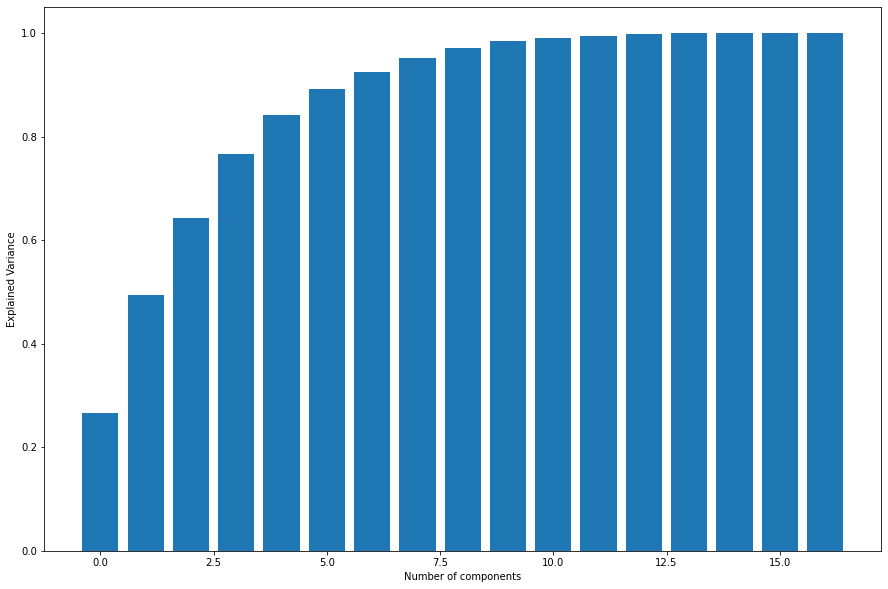

In [16]:
pca = PCA(Stand_X.shape[1])
GeometricPCA = pca.fit_transform(Stand_X)
eigenvalues = pca.explained_variance_ratio_

#plot explained variance over the number of compinents
n=17
plt.figure(figsize=(15, 10))

plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [17]:
print(np.sum(pca.explained_variance_ratio_[:5]))
print(np.sum(pca.explained_variance_ratio_))

0.8425956031173202
1.0


In [18]:
pca = PCA(Stand_X.shape[1])
GeometricPCA = pca.fit_transform(Stand_X)
GeometricPCADF = pd.DataFrame(GeometricPCA)
GeometricPCADF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.678417,-1.937917,1.439054,0.056775,-0.725757,0.566545,-0.121951,-0.960773,0.481674,0.100499,0.113929,-0.011082,-0.572054,-0.107680,-0.038592,2.153283e-08,-3.529975e-14
1,-2.115142,1.523652,-0.420874,-0.882338,-0.138720,0.215515,0.592170,1.263269,-0.223710,-0.480211,0.034275,-0.094986,-0.217791,-0.075129,-0.050174,1.131117e-08,4.344518e-13
2,-1.390870,-1.175848,-1.228112,1.261590,-0.324410,0.308815,0.338850,0.406117,-0.557109,-0.026540,0.042927,-0.047152,-0.125663,-0.265467,-0.064538,1.656744e-08,3.991213e-16
3,1.065373,1.903743,-0.956107,0.729776,-0.490535,0.739917,0.142351,0.788720,0.541966,-0.405866,0.229704,-0.523737,-0.007860,-0.076246,0.023927,-1.707577e-07,4.526444e-16
4,0.222554,-1.214790,1.840185,-0.037619,-0.956602,0.674146,0.464939,0.457316,0.166456,-0.363649,0.170794,-0.110518,-0.016913,-0.076306,0.055022,-7.849050e-08,-4.373921e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.550689,-0.368339,-0.963697,-0.593792,-0.316496,-0.402295,-0.352857,-0.315207,-0.008398,0.079347,-0.161711,-0.332071,-0.049085,0.037035,0.080603,3.058387e-08,-3.830100e-16
44996,-1.099982,-1.920608,-0.276749,-2.575463,-0.615051,-1.517206,-0.264489,-0.117875,-0.336769,-0.127313,-0.128924,-0.037183,0.005028,-0.193767,-0.047737,-4.350858e-08,-4.049887e-16
44997,1.665455,-2.720087,0.269709,-1.585220,-0.398938,0.561512,0.390979,0.468368,0.076211,0.471811,-0.316871,0.292983,0.200024,-0.188840,-0.043063,-8.793342e-08,-4.417787e-16
44998,-0.942149,-0.429561,0.186692,0.494130,-0.540233,1.522121,-0.149402,-0.093446,0.981627,0.113658,0.131898,0.073009,-0.411186,-0.145981,0.044922,-4.117372e-08,-3.660026e-16


# Determine Number of Clusters for GMM

# Silhouette coefficient

In [323]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
#rcParams['figure.figsize'] = 16, 8

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
    
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 16)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(GeometricPCADF) 
        labels=gmm.predict(GeometricPCADF)
        sil=metrics.silhouette_score(GeometricPCADF, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

# Train - Test distance check

In [155]:

#Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric

def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [156]:
n_clusters=np.arange(2, 20)
iterations=5
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(GeometricPCADF, test_size=0.5)
        
        gmm_train=GMM(n, n_init=1).fit(train) 
        gmm_test=GMM(n, n_init=1).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

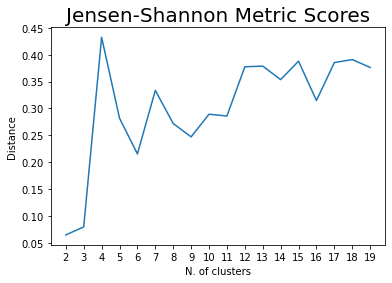

In [157]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Jensen-Shannon Metric Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

# BIC

In [158]:
n_clusters=np.arange(4, 14)
bics=[]
bics_err=[]
iterations=5
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=1,tol=1e-3,max_iter=100).fit(GeometricPCADF) 
        
        tmp_bic.append(gmm.bic(GeometricPCADF))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

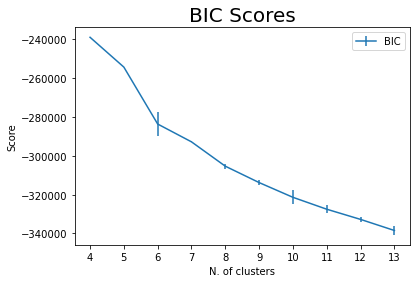

In [159]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

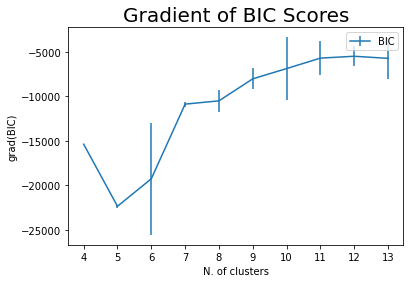

In [160]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

obj={'Metric': ['Silohuette score', 'Distance between Train and Test GMMs', 'Gradient of BIC scores'],
    "number of clusters": [5,6,6]}
df=pd.DataFrame(obj)
df.set_index('Metric')

# GMM for geometric features

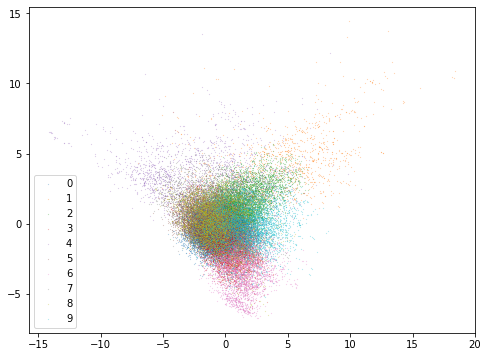

In [161]:
# GMM with 80% explainability

n = 10
gm = GaussianMixture(n_components=n).fit(GeometricPCADF.iloc[:,:5])
GeometricPCADF['labels'] = 0
GeometricPCADF['labels'] = gm.predict(GeometricPCADF.iloc[:,:5])

fig = plt.figure(1, figsize=(8, 6))
for i in range(n):
  plt.scatter(np.array(GeometricPCADF[GeometricPCADF.labels==i][0]), np.array(GeometricPCADF[GeometricPCADF.labels==i][1]),label=i,marker=".",s=0.05)
plt.legend()
plt.show()

In [162]:
buildings = pd.read_csv('C:/Users/coeya/5_Capstone/Data/city_layouts_with_clustering.csv',index_col=0)
#buildings = buildings[buildings.train_index>0]

In [163]:
buildings['gmm_geometric'] = 0
buildings['gmm_geometric'] = GeometricPCADF['labels']

In [164]:
#buildings.sort_values(by=['train_index'],inplace=True)
buildings = buildings.reset_index(drop=True)
buildings = buildings.iloc[:45000,:]
buildings

,index,x,y,zipcode,nta,dbscan,gmm,gmm_geometric
0,26489,9.991029e+05,235735.892554,10027,Central Harlem North-Polo Grounds,5,4,0
1,41270,9.834253e+05,203571.228461,10012,SoHo-TriBeCa-Civic Center-Little Italy,0,1,7
2,35657,9.898435e+05,214944.631124,10036,Midtown-Midtown South,0,1,0
3,18133,9.985651e+05,221002.182447,10028,Yorkville,0,4,2
4,16208,1.001484e+06,229830.613688,10035,East Harlem North,0,7,0
...,...,...,...,...,...,...,...,...
44995,22687,9.832918e+05,209702.358570,10011,Hudson Yards-Chelsea-Flatiron-Union Square,0,0,0
44996,17948,9.825706e+05,208467.089677,10014,West Village,0,5,0
44997,29302,9.957593e+05,217061.760522,10065,Lenox Hill-Roosevelt Island,0,5,6
44998,37497,9.972404e+05,222780.322079,10028,Yorkville,0,6,0


# PCA for latent space features

In [316]:
X = LatentSpace

In [317]:
sc = StandardScaler()
Stand_X = sc.fit_transform(X)

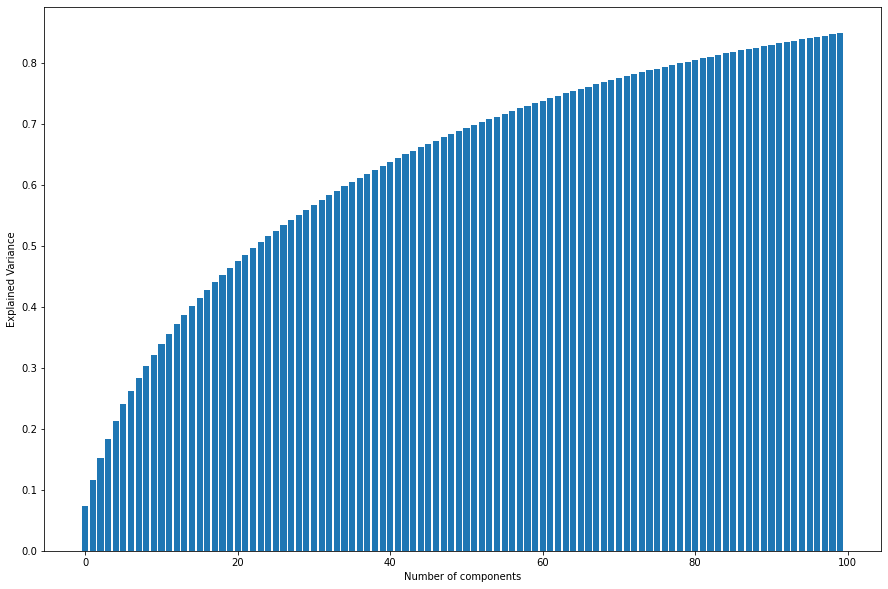

In [318]:
pca = PCA(Stand_X.shape[1])
LatentSpacePCA = pca.fit_transform(Stand_X)
eigenvalues = pca.explained_variance_ratio_

#plot explained variance over the number of compinents
n=100
plt.figure(figsize=(15, 10))

plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [319]:
print(np.sum(pca.explained_variance_ratio_[:50]))
print(np.sum(pca.explained_variance_ratio_))

0.68814003
1.0000001


In [320]:
pca = PCA(Stand_X.shape[1])
LatentSpacePCA = pca.fit_transform(Stand_X)
LatentSpacePCADF = pd.DataFrame(LatentSpacePCA)
LatentSpacePCADF

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,-0.003911,-0.012358,-0.007374,-0.022156,0.003337,0.013435,-0.005570,-0.006217,-0.005397,0.005810
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-0.003226,-0.017594,-0.015673,-0.004406,-0.028778,0.009819,0.018022,-0.007021,-0.000974,-0.002619
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,0.010343,-0.016836,0.024851,0.016597,-0.029447,0.005212,-0.011487,-0.006606,0.002611,-0.005519
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-0.001390,0.007298,0.003881,-0.011851,0.009985,0.016558,0.021136,0.001674,-0.001624,0.007559
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,-0.033997,-0.010948,-0.026027,-0.008563,-0.003555,-0.005974,0.014773,0.001445,0.016661,0.003277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,-0.017306,0.004746,0.034526,0.005768,-0.023913,-0.006451,0.022758,-0.008000,0.011255,0.008245
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.051298,-0.008656,0.026799,0.000407,-0.017336,-0.003159,-0.008428,0.000348,0.003622,-0.009200
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,0.006325,-0.019968,0.008006,-0.001508,0.031995,-0.001519,-0.012776,0.004435,0.007550,0.000232
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.013545,-0.016287,0.019467,0.005219,0.019659,-0.008014,-0.018498,0.004957,0.006256,-0.000986


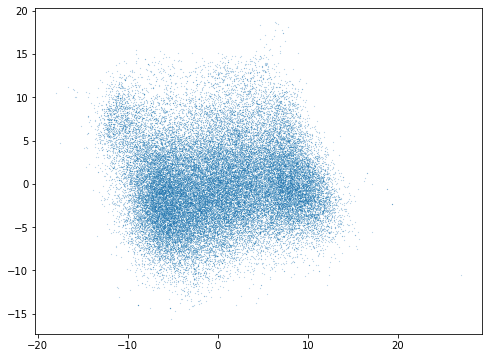

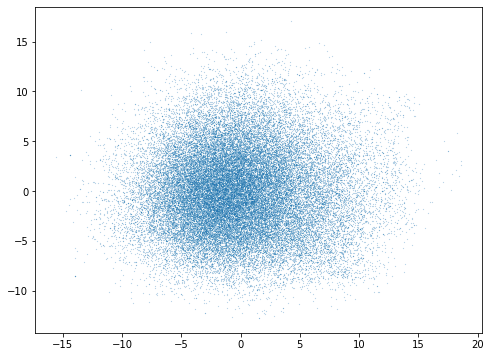

In [321]:
fig = plt.figure(1, figsize=(8, 6))
plt.scatter(np.array(LatentSpacePCADF[0]), np.array(LatentSpacePCADF[1]),marker=".",s=0.05)
plt.show()

fig = plt.figure(1, figsize=(8, 6))
plt.scatter(np.array(LatentSpacePCADF[1]), np.array(LatentSpacePCADF[2]),marker=".",s=0.05)
plt.show()

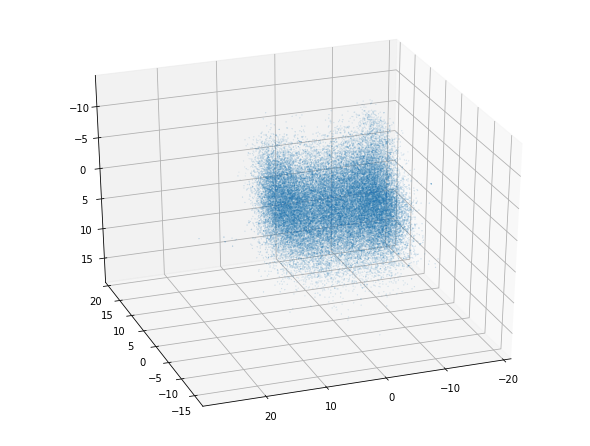

In [322]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(np.array(LatentSpacePCADF[0]),
          np.array(LatentSpacePCADF[1]),
          np.array(LatentSpacePCADF[2]),marker='.',s=0.05)

# Determine Number of Clusters for GMM

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
#rcParams['figure.figsize'] = 16, 8

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
    
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 16)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(LatentSpacePCADF.iloc[:,:50]) 
        labels=gmm.predict(LatentSpacePCADF.iloc[:,:50])
        sil=metrics.silhouette_score(LatentSpacePCADF.iloc[:,:50], labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

# Train - Test distance check

In [266]:

#Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric

def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [267]:
n_clusters=np.arange(2, 20)
iterations=5
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(LatentSpacePCADF.iloc[:,:50], test_size=0.5)
        
        gmm_train=GMM(n, n_init=1).fit(train) 
        gmm_test=GMM(n, n_init=1).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

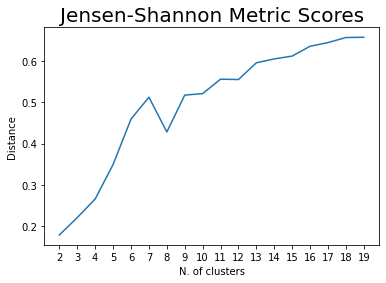

In [268]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Jensen-Shannon Metric Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

# BIC

In [269]:
n_clusters=np.arange(4, 14)
bics=[]
bics_err=[]
iterations=5
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=1,tol=1e-3,max_iter=100).fit(LatentSpacePCADF.iloc[:,:50]) 
        
        tmp_bic.append(gmm.bic(LatentSpacePCADF.iloc[:,:50]))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

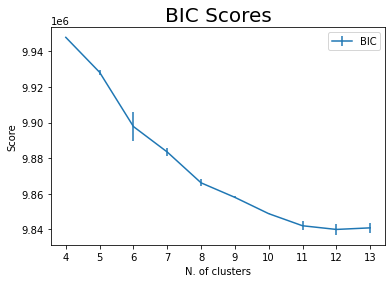

In [270]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

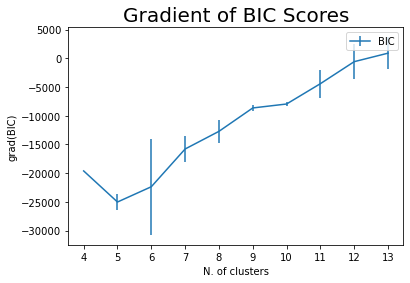

In [271]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

# GMM for latent space features

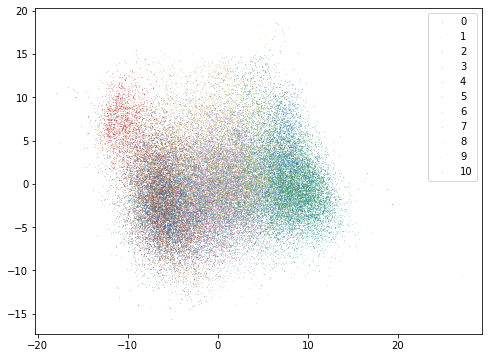

In [31]:
# GMM with 68% explainability

n = 11
gm = GaussianMixture(n_components=n).fit(LatentSpacePCADF.iloc[:,:50])
LatentSpacePCADF['labels'] = 0
LatentSpacePCADF['labels'] = gm.predict(LatentSpacePCADF.iloc[:,:50])

fig = plt.figure(1, figsize=(8, 6))
for i in range(n):
  plt.scatter(np.array(LatentSpacePCADF[LatentSpacePCADF.labels==i][0]), np.array(LatentSpacePCADF[LatentSpacePCADF.labels==i][1]),label=i,marker=".",s=0.05)
plt.legend()
plt.show()

In [32]:
buildings['gmm_LS'] = 0
buildings['gmm_LS'] = LatentSpacePCADF['labels']

buildings

,index,x,y,zipcode,nta,dbscan,gmm,gmm_geometric,gmm_LS
0,26489,9.991029e+05,235735.892554,10027,Central Harlem North-Polo Grounds,5,4,1,10
1,41270,9.834253e+05,203571.228461,10012,SoHo-TriBeCa-Civic Center-Little Italy,0,1,2,10
2,35657,9.898435e+05,214944.631124,10036,Midtown-Midtown South,0,1,1,6
3,18133,9.985651e+05,221002.182447,10028,Yorkville,0,4,6,1
4,16208,1.001484e+06,229830.613688,10035,East Harlem North,0,7,1,8
...,...,...,...,...,...,...,...,...,...
44995,22687,9.832918e+05,209702.358570,10011,Hudson Yards-Chelsea-Flatiron-Union Square,0,0,1,5
44996,17948,9.825706e+05,208467.089677,10014,West Village,0,5,5,5
44997,29302,9.957593e+05,217061.760522,10065,Lenox Hill-Roosevelt Island,0,5,5,3
44998,37497,9.972404e+05,222780.322079,10028,Yorkville,0,6,1,6


In [33]:
LatentClusterLabels = buildings[['gmm_LS']].reset_index(drop=True)
LatentClusterLabels

,gmm_LS
0,10
1,10
2,6
3,1
4,8
...,...
44995,5
44996,5
44997,3
44998,6


#to get a 1-d version, if the list is in higher dimension

y = y.ravel()
#X = X.ravel()

y

In [34]:
buildings

,index,x,y,zipcode,nta,dbscan,gmm,gmm_geometric,gmm_LS
0,26489,9.991029e+05,235735.892554,10027,Central Harlem North-Polo Grounds,5,4,1,10
1,41270,9.834253e+05,203571.228461,10012,SoHo-TriBeCa-Civic Center-Little Italy,0,1,2,10
2,35657,9.898435e+05,214944.631124,10036,Midtown-Midtown South,0,1,1,6
3,18133,9.985651e+05,221002.182447,10028,Yorkville,0,4,6,1
4,16208,1.001484e+06,229830.613688,10035,East Harlem North,0,7,1,8
...,...,...,...,...,...,...,...,...,...
44995,22687,9.832918e+05,209702.358570,10011,Hudson Yards-Chelsea-Flatiron-Union Square,0,0,1,5
44996,17948,9.825706e+05,208467.089677,10014,West Village,0,5,5,5
44997,29302,9.957593e+05,217061.760522,10065,Lenox Hill-Roosevelt Island,0,5,5,3
44998,37497,9.972404e+05,222780.322079,10028,Yorkville,0,6,1,6


# Statistic Summary of LS Clusters

In [192]:
buildings = pd.read_csv('C:/Users/coeya/5_Capstone/Data/city_layouts_with_clustering.csv')

len(buildings)

45000

In [194]:
buildings['gmm']

0         4
1        10
2         3
3         0
4         7
         ..
44995    10
44996    10
44997     1
44998     3
44999    10
Name: gmm, Length: 45000, dtype: int64

In [195]:
GeometricFeatures

,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter,C_mean,C_median,C_max,C_min
0,0.215197,11.512384,0.612699,0.746051,3.236755,0.001073,-0.568640,0.004308,0.006725,0.017902,0.095110,0.359762,0.351048,0.355754,0.321078,0.596759,0.086527
1,0.161158,8.267206,1.439193,1.032524,3.526648,0.101728,-0.447973,0.006640,0.005036,0.028439,0.154204,0.258350,0.604909,0.334986,0.361224,0.489787,0.047208
2,0.191622,10.888162,1.685483,1.243508,3.879776,0.001029,-0.556468,0.003577,0.005988,0.014085,0.097791,0.340255,0.342788,0.301146,0.314366,0.494794,0.040029
3,0.226602,9.853267,1.231770,1.466105,4.746412,0.004152,-0.510148,0.012274,0.007081,0.055819,0.189777,0.307915,0.812552,0.305632,0.332293,0.494883,0.027265
4,0.236437,11.239347,0.767389,0.729433,2.682584,0.004699,-0.622231,0.006889,0.007389,0.026191,0.126585,0.351230,0.486740,0.355788,0.385671,0.555056,0.065076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.190722,10.087881,0.966989,1.001432,3.063737,0.004250,-0.455438,0.006315,0.005960,0.026840,0.125345,0.315246,0.586196,0.292218,0.285829,0.499516,0.083180
44996,0.176484,9.875311,0.542330,0.296419,1.110547,0.006771,-0.491689,0.003713,0.005515,0.012793,0.109811,0.308603,0.386057,0.295111,0.296991,0.459265,0.122599
44997,0.231974,12.193813,0.345635,0.219404,1.300556,0.000332,-0.603540,0.006815,0.007249,0.039986,0.105454,0.381057,0.579906,0.291843,0.325993,0.489678,0.034332
44998,0.195098,10.642547,0.826792,1.076630,4.755907,0.000797,-0.522788,0.006290,0.006097,0.028194,0.112036,0.332580,0.494554,0.339915,0.331792,0.579718,0.028631


In [198]:
GeometricLSCluster = pd.concat([GeometricFeatures, buildings['gmm']], axis=1)
GeometricLSCluster

,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter,C_mean,C_median,C_max,C_min,gmm
0,0.215197,11.512384,0.612699,0.746051,3.236755,0.001073,-0.568640,0.004308,0.006725,0.017902,0.095110,0.359762,0.351048,0.355754,0.321078,0.596759,0.086527,4
1,0.161158,8.267206,1.439193,1.032524,3.526648,0.101728,-0.447973,0.006640,0.005036,0.028439,0.154204,0.258350,0.604909,0.334986,0.361224,0.489787,0.047208,10
2,0.191622,10.888162,1.685483,1.243508,3.879776,0.001029,-0.556468,0.003577,0.005988,0.014085,0.097791,0.340255,0.342788,0.301146,0.314366,0.494794,0.040029,3
3,0.226602,9.853267,1.231770,1.466105,4.746412,0.004152,-0.510148,0.012274,0.007081,0.055819,0.189777,0.307915,0.812552,0.305632,0.332293,0.494883,0.027265,0
4,0.236437,11.239347,0.767389,0.729433,2.682584,0.004699,-0.622231,0.006889,0.007389,0.026191,0.126585,0.351230,0.486740,0.355788,0.385671,0.555056,0.065076,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.190722,10.087881,0.966989,1.001432,3.063737,0.004250,-0.455438,0.006315,0.005960,0.026840,0.125345,0.315246,0.586196,0.292218,0.285829,0.499516,0.083180,10
44996,0.176484,9.875311,0.542330,0.296419,1.110547,0.006771,-0.491689,0.003713,0.005515,0.012793,0.109811,0.308603,0.386057,0.295111,0.296991,0.459265,0.122599,10
44997,0.231974,12.193813,0.345635,0.219404,1.300556,0.000332,-0.603540,0.006815,0.007249,0.039986,0.105454,0.381057,0.579906,0.291843,0.325993,0.489678,0.034332,1
44998,0.195098,10.642547,0.826792,1.076630,4.755907,0.000797,-0.522788,0.006290,0.006097,0.028194,0.112036,0.332580,0.494554,0.339915,0.331792,0.579718,0.028631,3


In [199]:
Cluster1 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 0].describe()
Cluster2 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 1].describe()
Cluster3 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 2].describe()
Cluster4 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 3].describe()
Cluster5 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 4].describe()
Cluster6 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 5].describe()
Cluster7 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 6].describe()
Cluster8 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 7].describe()
Cluster9 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 8].describe()
Cluster10 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 9].describe()
Cluster11 = GeometricLSCluster.loc[GeometricLSCluster['gmm'] == 10].describe()

Cluster1

,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter,C_mean,C_median,C_max,C_min,gmm
count,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.0
mean,0.196513,9.534368,1.185181,0.986352,3.681120,0.096596,-0.378175,0.008463,0.006141,0.041914,0.149984,0.297949,0.699049,0.323048,0.332557,0.547913,0.075871,0.0
std,0.056739,1.813645,0.490198,0.388254,1.555864,0.160268,0.279921,0.005740,0.001773,0.033432,0.053063,0.056676,0.305455,0.063796,0.073237,0.085130,0.057460,0.0
min,0.004613,1.368194,0.265539,0.028626,0.131181,0.000001,-0.922606,0.000236,0.000144,0.001090,0.026833,0.042756,0.106353,0.197928,0.161200,0.411587,0.011775,0.0
25%,0.163702,8.703655,0.852605,0.742397,2.868060,0.002845,-0.538075,0.004893,0.005116,0.021635,0.113344,0.271989,0.492006,0.287515,0.291302,0.491132,0.036874,0.0
50%,0.198577,9.743805,1.140774,0.991147,3.610150,0.006892,-0.468362,0.007002,0.006206,0.032562,0.142969,0.304494,0.635864,0.310074,0.324202,0.523802,0.058334,0.0
75%,0.232184,10.647991,1.456658,1.221054,4.284930,0.136850,-0.349579,0.010195,0.007256,0.049774,0.177374,0.332750,0.826385,0.339515,0.358884,0.578554,0.095566,0.0
max,0.426074,14.961538,4.132260,3.204183,17.404934,0.845246,0.883080,0.052647,0.013315,0.303442,0.426739,0.467548,2.509952,0.847584,0.862043,0.972338,0.647707,0.0


In [200]:
Cluster11

,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter,C_mean,C_median,C_max,C_min,gmm
count,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.0
mean,0.212883,10.515924,1.160348,1.009447,3.651547,0.021663,-0.485475,0.006916,0.006653,0.033014,0.129413,0.328623,0.594755,0.306840,0.314650,0.510687,0.076381,10.0
std,0.039346,1.185155,0.484112,0.363468,1.251265,0.056083,0.092459,0.003555,0.001230,0.020395,0.038899,0.037036,0.213459,0.031628,0.040789,0.048417,0.042097,0.0
min,0.066855,4.817696,0.250617,0.039925,0.207135,0.000001,-0.774247,0.000614,0.002089,0.003262,0.017035,0.150553,0.112873,0.204940,0.172659,0.395481,0.011680,10.0
25%,0.185804,9.739584,0.814385,0.785061,3.043157,0.002057,-0.541861,0.004532,0.005806,0.019624,0.101530,0.304362,0.445596,0.286456,0.287135,0.478179,0.043134,10.0
50%,0.209835,10.475778,1.104195,1.035691,3.664115,0.003790,-0.490427,0.006214,0.006557,0.027962,0.126152,0.327368,0.562220,0.304907,0.315006,0.501516,0.067565,10.0
75%,0.237949,11.275987,1.433564,1.252771,4.285548,0.008073,-0.437312,0.008453,0.007436,0.040219,0.152333,0.352375,0.705317,0.323940,0.340026,0.532180,0.100092,10.0
max,0.371530,15.171960,4.184270,2.557472,13.114403,0.725692,0.464626,0.042740,0.011610,0.247460,0.390406,0.474124,2.305346,0.705667,0.691848,0.945894,0.513342,10.0


In [201]:
# mean

Mean = pd.concat([Cluster1.iloc[[1]],
           Cluster2.iloc[[1]],
           Cluster3.iloc[[1]],
           Cluster4.iloc[[1]],
           Cluster5.iloc[[1]],
           Cluster6.iloc[[1]],
           Cluster7.iloc[[1]],
           Cluster8.iloc[[1]],
           Cluster9.iloc[[1]],
           Cluster10.iloc[[1]],
           Cluster11.iloc[[1]]
           ],
          ignore_index=True)

In [202]:
Mean.to_csv('C:/Users/coeya/5_Capstone/Data/Mean.csv', index = False)

In [203]:
# standard deviation

Std_Deviation = pd.concat([Cluster1.iloc[[2]],
           Cluster2.iloc[[2]],
           Cluster3.iloc[[2]],
           Cluster4.iloc[[2]],
           Cluster5.iloc[[2]],
           Cluster6.iloc[[2]],
           Cluster7.iloc[[2]],
           Cluster8.iloc[[2]],
           Cluster9.iloc[[2]],
           Cluster10.iloc[[2]],
           Cluster11.iloc[[2]]
           ],
          ignore_index=True)

In [204]:
Std_Deviation.to_csv('C:/Users/coeya/5_Capstone/Data/Std_Deviation.csv', index = False)

In [205]:
# min

min = pd.concat([Cluster1.iloc[[3]],
           Cluster2.iloc[[3]],
           Cluster3.iloc[[3]],
           Cluster4.iloc[[3]],
           Cluster5.iloc[[3]],
           Cluster6.iloc[[3]],
           Cluster7.iloc[[3]],
           Cluster8.iloc[[3]],
           Cluster9.iloc[[3]],
           Cluster10.iloc[[3]],
           Cluster11.iloc[[3]]
           ],
          ignore_index=True)

In [206]:
min.to_csv('C:/Users/coeya/5_Capstone/Data/min.csv', index = False)

In [207]:
# max

max = pd.concat([Cluster1.iloc[[7]],
           Cluster2.iloc[[7]],
           Cluster3.iloc[[7]],
           Cluster4.iloc[[7]],
           Cluster5.iloc[[7]],
           Cluster6.iloc[[7]],
           Cluster7.iloc[[7]],
           Cluster8.iloc[[7]],
           Cluster9.iloc[[7]],
           Cluster10.iloc[[7]],
           Cluster11.iloc[[7]]
           ],
          ignore_index=True)

In [208]:
max.to_csv('C:/Users/coeya/5_Capstone/Data/max.csv', index = False)

In [209]:
# count

count = pd.concat([Cluster1.iloc[[0]],
           Cluster2.iloc[[0]],
           Cluster3.iloc[[0]],
           Cluster4.iloc[[0]],
           Cluster5.iloc[[0]],
           Cluster6.iloc[[0]],
           Cluster7.iloc[[0]],
           Cluster8.iloc[[0]],
           Cluster9.iloc[[0]],
           Cluster10.iloc[[0]],
           Cluster11.iloc[[0]]
           ],
          ignore_index=True)

In [210]:
count.to_csv('C:/Users/coeya/5_Capstone/Data/count.csv', index = False)

# Part 1: Analysis to predict geometric clusters using latent space

In [35]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import shap
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sn

In [36]:
#X = LatentSpacePCADF

X = LatentSpacePCADF.iloc[:,:50]
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.005596,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,0.780583,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,0.587116,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-2.517256,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,-2.524161,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.825062,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,3.432168,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-2.165442,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.516262,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380


In [37]:
buildings

,index,x,y,zipcode,nta,dbscan,gmm,gmm_geometric,gmm_LS
0,26489,9.991029e+05,235735.892554,10027,Central Harlem North-Polo Grounds,5,4,9,2
1,41270,9.834253e+05,203571.228461,10012,SoHo-TriBeCa-Civic Center-Little Italy,0,1,0,2
2,35657,9.898435e+05,214944.631124,10036,Midtown-Midtown South,0,1,9,1
3,18133,9.985651e+05,221002.182447,10028,Yorkville,0,4,1,5
4,16208,1.001484e+06,229830.613688,10035,East Harlem North,0,7,9,4
...,...,...,...,...,...,...,...,...,...
44995,22687,9.832918e+05,209702.358570,10011,Hudson Yards-Chelsea-Flatiron-Union Square,0,0,9,2
44996,17948,9.825706e+05,208467.089677,10014,West Village,0,5,3,2
44997,29302,9.957593e+05,217061.760522,10065,Lenox Hill-Roosevelt Island,0,5,3,3
44998,37497,9.972404e+05,222780.322079,10028,Yorkville,0,6,9,1


In [38]:
Y = buildings[['gmm_geometric']].reset_index(drop=True)
Y

,gmm_geometric
0,9
1,0
2,9
3,1
4,9
...,...
44995,9
44996,3
44997,3
44998,9


In [39]:
Combined = pd.concat([X, Y], axis=1)
Combined

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,gmm_geometric
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707,9
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323,0
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729,9
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910,1
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300,9
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697,3
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818,3
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380,9


In [40]:
Combined_10per = Combined.sample(frac=0.1)
Combined_10per

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,gmm_geometric
13387,0.116097,-2.896510,3.196038,-4.375709,-4.263731,7.107213,8.336124,0.166836,-1.470663,-2.285534,...,0.635757,-2.036720,4.475566,3.272356,-0.173189,-4.584941,-1.058723,-1.469718,-1.209156,4
18331,5.301122,5.188544,3.944124,-1.150375,-0.959156,6.156508,1.776202,-1.831696,-2.502068,-3.165739,...,0.079662,-0.322436,1.548716,0.662852,-0.601382,-3.485540,-2.342032,0.325263,0.514010,2
35773,-3.591424,1.823437,6.170901,6.126938,5.969111,9.234347,4.417472,-1.026632,-2.717939,-0.400990,...,0.492435,-1.045972,0.039110,-0.924547,-1.768733,0.897455,-0.869468,-1.472134,-3.669623,2
34574,3.327794,-3.053786,6.138675,-4.717394,6.964477,2.582850,-2.657401,-0.443889,4.077501,-4.427379,...,-1.203878,2.381669,0.189701,1.771168,-1.965157,-2.577742,-2.628484,-0.004647,2.164020,2
6633,-1.859442,1.330580,-1.895599,3.654226,7.554439,-1.065845,2.375137,-0.229549,-2.928095,-1.606007,...,-0.402339,-2.649397,1.408295,-2.050950,-4.389474,-0.369702,0.362629,-2.621186,-1.891980,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24021,5.762258,0.271454,2.891206,-0.628969,-1.025274,-6.263500,1.040956,1.201003,2.256680,-0.398589,...,1.227896,-0.242626,1.136175,-0.356212,0.524913,-0.294539,-1.072893,0.305983,0.973050,1
256,-3.002663,1.719728,0.058595,-0.443019,4.533750,-3.045678,2.874529,-2.169464,-3.080181,7.634707,...,-1.899246,0.082230,-0.084672,0.678772,-0.685728,2.130087,-0.552296,2.761747,-0.710328,5
3914,-8.231795,-2.676648,1.694302,0.967255,-2.222542,0.830938,-3.885503,-1.862574,0.822374,1.695392,...,0.322340,-1.951837,0.822770,-0.289857,-2.484728,-0.950024,2.173859,-0.382229,0.215013,9
27948,4.296042,-0.682569,3.044552,4.267010,-2.409634,-6.141687,2.920691,-1.799973,5.757639,3.201787,...,-0.702902,-1.834170,-4.315847,-0.992062,-1.891835,0.718793,-0.452022,0.917014,1.725793,9


In [41]:
Y = Combined_10per[['gmm_geometric']].reset_index(drop=True)
Y

,gmm_geometric
0,4
1,2
2,2
3,2
4,2
...,...
4495,1
4496,5
4497,9
4498,9


In [42]:
X = Combined_10per.iloc[:,:50].reset_index(drop=True)
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.116097,-2.896510,3.196038,-4.375709,-4.263731,7.107213,8.336124,0.166836,-1.470663,-2.285534,...,-1.955749,0.635757,-2.036720,4.475566,3.272356,-0.173189,-4.584941,-1.058723,-1.469718,-1.209156
1,5.301122,5.188544,3.944124,-1.150375,-0.959156,6.156508,1.776202,-1.831696,-2.502068,-3.165739,...,1.142344,0.079662,-0.322436,1.548716,0.662852,-0.601382,-3.485540,-2.342032,0.325263,0.514010
2,-3.591424,1.823437,6.170901,6.126938,5.969111,9.234347,4.417472,-1.026632,-2.717939,-0.400990,...,0.136717,0.492435,-1.045972,0.039110,-0.924547,-1.768733,0.897455,-0.869468,-1.472134,-3.669623
3,3.327794,-3.053786,6.138675,-4.717394,6.964477,2.582850,-2.657401,-0.443889,4.077501,-4.427379,...,-3.154974,-1.203878,2.381669,0.189701,1.771168,-1.965157,-2.577742,-2.628484,-0.004647,2.164020
4,-1.859442,1.330580,-1.895599,3.654226,7.554439,-1.065845,2.375137,-0.229549,-2.928095,-1.606007,...,-0.983244,-0.402339,-2.649397,1.408295,-2.050950,-4.389474,-0.369702,0.362629,-2.621186,-1.891980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,5.762258,0.271454,2.891206,-0.628969,-1.025274,-6.263500,1.040956,1.201003,2.256680,-0.398589,...,-1.845886,1.227896,-0.242626,1.136175,-0.356212,0.524913,-0.294539,-1.072893,0.305983,0.973050
4496,-3.002663,1.719728,0.058595,-0.443019,4.533750,-3.045678,2.874529,-2.169464,-3.080181,7.634707,...,1.971937,-1.899246,0.082230,-0.084672,0.678772,-0.685728,2.130087,-0.552296,2.761747,-0.710328
4497,-8.231795,-2.676648,1.694302,0.967255,-2.222542,0.830938,-3.885503,-1.862574,0.822374,1.695392,...,0.903604,0.322340,-1.951837,0.822770,-0.289857,-2.484728,-0.950024,2.173859,-0.382229,0.215013
4498,4.296042,-0.682569,3.044552,4.267010,-2.409634,-6.141687,2.920691,-1.799973,5.757639,3.201787,...,0.818732,-0.702902,-1.834170,-4.315847,-0.992062,-1.891835,0.718793,-0.452022,0.917014,1.725793


In [43]:
# 1st Baseline test - random prediction algorithm

from random import seed
from random import randrange
 
# Generate random predictions
def random_algorithm(train, test):
    output_values = [row[-1] for row in train]
    unique = list(set(output_values))
    predicted = list()
    for row in test:
        index = randrange(len(unique))
        predicted.append(unique[index])
    return predicted
 
seed(1)

train = Y['gmm_geometric'].to_list()
test = [None] * 4500

def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_Random_Pred = random_algorithm(train_nested, test_nested)

accuracy_score(train, Y_Random_Pred)

0.09888888888888889

In [44]:
# 2nd Baseline test - zero rule algorithm

from random import seed
from random import randrange
 
# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
    output_values = [row[-1] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(test))]
    return predicted
 
seed(1)

train = Y['gmm_geometric'].to_list()
test = [None] * 4500

def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_ZeroR_Pred = zero_rule_algorithm_classification(train_nested, test_nested)

accuracy_score(train, Y_ZeroR_Pred)

0.29555555555555557

# Benchmark test

Y_Benchmark = pd.DataFrame(index=np.arange(900), columns=['gmm_geometric'])
Y_Benchmark['gmm_geometric']= 8
Y_Benchmark

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
scaler = RobustScaler() 

In [46]:
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [47]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [48]:
clf.score(X_test, y_test)

0.4033333333333333

In [49]:
# 1st Baseline test - random prediction algorithm. Test results applies to all ML as using same split.

from random import seed
from random import randrange
 
# Generate random predictions
def random_algorithm(train, test):
    output_values = [row[-1] for row in train]
    unique = list(set(output_values))
    predicted = list()
    for row in test:
        index = randrange(len(unique))
        predicted.append(unique[index])
    return predicted
 
seed(1)

train = y_test['gmm_geometric'].to_list() # change attribute
test = [None] * 900 # change number of rows



def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_Random_Pred = random_algorithm(train_nested, test_nested)

a = train
b = Y_Random_Pred

accuracy_score(train, Y_Random_Pred)

0.10666666666666667

In [50]:
# 2nd Baseline test - zero rule algorithm. Test results applies to all ML as using same split.

from random import seed
from random import randrange
 
# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
    output_values = [row[-1] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(test))]
    return predicted
 
seed(1)

train = y_test['gmm_geometric'].to_list() # change attribute
test = [None] * 900 # change number of rows

def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_ZeroR_Pred = zero_rule_algorithm_classification(train_nested, test_nested)

a = train
b = Y_ZeroR_Pred

accuracy_score(train, Y_ZeroR_Pred)

0.3088888888888889

# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
clf = DecisionTreeClassifier(random_state=42)

In [54]:
grid = {'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 13),
               'min_samples_leaf': [1, 2, 4],}

In [55]:
clf_random = GridSearchCV(estimator = clf, param_grid = grid, cv = 3, n_jobs = -2)
clf_random.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-2,
             param_grid={'max_depth': range(2, 13),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4]})

In [56]:
clf_random.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                       random_state=42)

In [57]:
best_model = clf_random.best_estimator_
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.3

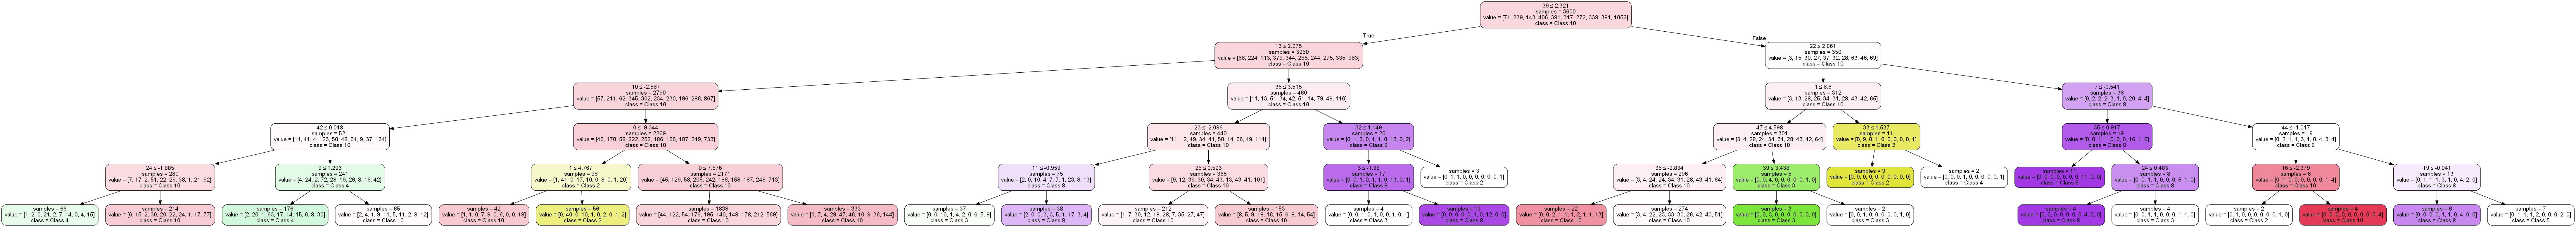

In [58]:
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(best_model, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()

In [61]:
grid = {'n_estimators': range(200, 2001, 200),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 15, 2),
               'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]}

In [62]:
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = grid, n_iter = 50, cv = 2, verbose=2, random_state=42, n_jobs = -2)
clf_random.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 15, 2),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': range(200, 2001, 200)},
                   random_state=42, verbose=2)

In [63]:
clf_random.best_params_

{'n_estimators': 1400,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': False}

In [64]:
best_model = clf_random.best_estimator_
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.38333333333333336

# SVM

In [65]:
from sklearn.svm import SVC

In [66]:
for k in ["linear", "poly", "rbf", "sigmoid"]:
    clf = make_pipeline(RobustScaler(), SVC(kernel=k, C=1.0, probability=True))
    clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

linear 0.4
poly 0.36444444444444446
rbf 0.4166666666666667
sigmoid 0.4022222222222222


In [67]:
model = SVC(kernel="rbf", C=1.0, probability=True)
scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4166666666666667

# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [70]:
neigh = KNeighborsClassifier()

In [71]:
grid = {"n_neighbors": range(2, 30), "weights": ["uniform", "distance"]}
neigh_random = GridSearchCV(estimator = neigh, param_grid = grid, cv = 3, n_jobs = -2)
neigh_random.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-2,
             param_grid={'n_neighbors': range(2, 30),
                         'weights': ['uniform', 'distance']})

In [72]:
neigh_random.best_estimator_

KNeighborsClassifier(n_neighbors=27, weights='distance')

In [73]:
best_model = neigh_random.best_estimator_
model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.37555555555555553

# Part 2: Analysis to predict latent space clusters using geometric features

In [74]:
X = GeometricFeatures

# X = GeometricPCADF.iloc[:,:5]
X

,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter,C_mean,C_median,C_max,C_min
0,0.215197,11.512384,0.612699,0.746051,3.236755,0.001073,-0.568640,0.004308,0.006725,0.017902,0.095110,0.359762,0.351048,0.355754,0.321078,0.596759,0.086527
1,0.161158,8.267206,1.439193,1.032524,3.526648,0.101728,-0.447973,0.006640,0.005036,0.028439,0.154204,0.258350,0.604909,0.334986,0.361224,0.489787,0.047208
2,0.191622,10.888162,1.685483,1.243508,3.879776,0.001029,-0.556468,0.003577,0.005988,0.014085,0.097791,0.340255,0.342788,0.301146,0.314366,0.494794,0.040029
3,0.226602,9.853267,1.231770,1.466105,4.746412,0.004152,-0.510148,0.012274,0.007081,0.055819,0.189777,0.307915,0.812552,0.305632,0.332293,0.494883,0.027265
4,0.236437,11.239347,0.767389,0.729433,2.682584,0.004699,-0.622231,0.006889,0.007389,0.026191,0.126585,0.351230,0.486740,0.355788,0.385671,0.555056,0.065076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.190722,10.087881,0.966989,1.001432,3.063737,0.004250,-0.455438,0.006315,0.005960,0.026840,0.125345,0.315246,0.586196,0.292218,0.285829,0.499516,0.083180
44996,0.176484,9.875311,0.542330,0.296419,1.110547,0.006771,-0.491689,0.003713,0.005515,0.012793,0.109811,0.308603,0.386057,0.295111,0.296991,0.459265,0.122599
44997,0.231974,12.193813,0.345635,0.219404,1.300556,0.000332,-0.603540,0.006815,0.007249,0.039986,0.105454,0.381057,0.579906,0.291843,0.325993,0.489678,0.034332
44998,0.195098,10.642547,0.826792,1.076630,4.755907,0.000797,-0.522788,0.006290,0.006097,0.028194,0.112036,0.332580,0.494554,0.339915,0.331792,0.579718,0.028631


In [75]:
Y = LatentClusterLabels
Y

,gmm_LS
0,8
1,8
2,0
3,6
4,2
...,...
44995,3
44996,3
44997,5
44998,0


In [76]:
Combined = pd.concat([X, Y], axis=1)
Combined

,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter,C_mean,C_median,C_max,C_min,gmm_LS
0,0.215197,11.512384,0.612699,0.746051,3.236755,0.001073,-0.568640,0.004308,0.006725,0.017902,0.095110,0.359762,0.351048,0.355754,0.321078,0.596759,0.086527,8
1,0.161158,8.267206,1.439193,1.032524,3.526648,0.101728,-0.447973,0.006640,0.005036,0.028439,0.154204,0.258350,0.604909,0.334986,0.361224,0.489787,0.047208,8
2,0.191622,10.888162,1.685483,1.243508,3.879776,0.001029,-0.556468,0.003577,0.005988,0.014085,0.097791,0.340255,0.342788,0.301146,0.314366,0.494794,0.040029,0
3,0.226602,9.853267,1.231770,1.466105,4.746412,0.004152,-0.510148,0.012274,0.007081,0.055819,0.189777,0.307915,0.812552,0.305632,0.332293,0.494883,0.027265,6
4,0.236437,11.239347,0.767389,0.729433,2.682584,0.004699,-0.622231,0.006889,0.007389,0.026191,0.126585,0.351230,0.486740,0.355788,0.385671,0.555056,0.065076,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.190722,10.087881,0.966989,1.001432,3.063737,0.004250,-0.455438,0.006315,0.005960,0.026840,0.125345,0.315246,0.586196,0.292218,0.285829,0.499516,0.083180,3
44996,0.176484,9.875311,0.542330,0.296419,1.110547,0.006771,-0.491689,0.003713,0.005515,0.012793,0.109811,0.308603,0.386057,0.295111,0.296991,0.459265,0.122599,3
44997,0.231974,12.193813,0.345635,0.219404,1.300556,0.000332,-0.603540,0.006815,0.007249,0.039986,0.105454,0.381057,0.579906,0.291843,0.325993,0.489678,0.034332,5
44998,0.195098,10.642547,0.826792,1.076630,4.755907,0.000797,-0.522788,0.006290,0.006097,0.028194,0.112036,0.332580,0.494554,0.339915,0.331792,0.579718,0.028631,0


In [77]:
Combined_10per = Combined.sample(frac=0.1)
Combined_10per

,area,perimeter,avg_lw,std_lw,range_lw,std_rot,avg_rot,std_area,mean_area,range_area,std_perimeter,mean_perimeter,range_perimeter,C_mean,C_median,C_max,C_min,gmm_LS
29911,0.277644,11.214195,1.415806,1.357680,5.133613,0.002438,-0.431116,0.011809,0.008676,0.052768,0.177658,0.350444,0.751468,0.257224,0.261812,0.468086,0.102676,3
3317,0.254700,11.064907,0.904462,0.901735,3.684010,0.004331,-0.504671,0.011377,0.007959,0.067819,0.152515,0.345778,0.977743,0.337678,0.340895,0.549397,0.115344,3
24668,0.158138,9.289515,2.902773,2.294664,7.889069,0.042300,-0.552572,0.005447,0.004942,0.022031,0.151347,0.290297,0.560541,0.301249,0.300129,0.478061,0.042777,4
22257,0.210369,11.056844,1.187606,0.853962,3.001645,0.002111,-0.554616,0.003178,0.006574,0.017712,0.090165,0.345526,0.393353,0.320379,0.342924,0.469639,0.053229,8
21439,0.155458,8.877176,1.002867,0.773975,2.675191,0.003598,-0.513080,0.004056,0.004858,0.018889,0.099196,0.277412,0.451206,0.304642,0.331109,0.519548,0.093625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17438,0.202290,10.060582,0.879399,0.908295,3.517671,0.002346,-0.497113,0.007705,0.006322,0.042543,0.127775,0.314393,0.755456,0.314453,0.328366,0.527955,0.097189,9
8431,0.187435,10.619931,1.582470,1.245448,3.702550,0.006772,-0.338671,0.003069,0.005857,0.014077,0.084698,0.331873,0.355940,0.290171,0.267277,0.537182,0.113811,0
25199,0.198257,9.925031,0.877828,0.799363,3.395704,0.003102,-0.633580,0.007434,0.006196,0.039280,0.141842,0.310157,0.707061,0.291942,0.288125,0.457145,0.088153,0
44920,0.237145,12.466461,0.856116,1.175156,4.190675,0.002064,-0.524876,0.005926,0.007411,0.031656,0.096479,0.389577,0.446664,0.297205,0.315449,0.507822,0.037907,8


In [78]:
Y = Combined_10per[['gmm_LS']].reset_index(drop=True)
Y

,gmm_LS
0,3
1,3
2,4
3,8
4,1
...,...
4495,9
4496,0
4497,0
4498,8


In [79]:
X = Combined_10per.iloc[:,:5].reset_index(drop=True)
X

,area,perimeter,avg_lw,std_lw,range_lw
0,0.277644,11.214195,1.415806,1.357680,5.133613
1,0.254700,11.064907,0.904462,0.901735,3.684010
2,0.158138,9.289515,2.902773,2.294664,7.889069
3,0.210369,11.056844,1.187606,0.853962,3.001645
4,0.155458,8.877176,1.002867,0.773975,2.675191
...,...,...,...,...,...
4495,0.202290,10.060582,0.879399,0.908295,3.517671
4496,0.187435,10.619931,1.582470,1.245448,3.702550
4497,0.198257,9.925031,0.877828,0.799363,3.395704
4498,0.237145,12.466461,0.856116,1.175156,4.190675


# Benchmark test

Y_Benchmark = pd.DataFrame(index=np.arange(900), columns=['gmm_geometric'])
Y_Benchmark['gmm_geometric']= 8
Y_Benchmark

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
scaler = RobustScaler() 

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [81]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [82]:
clf.score(X_test, y_test)

0.20777777777777778

In [83]:
# 1st Baseline test - random prediction algorithm. Test results applies to all ML as using same split.

from random import seed
from random import randrange
 
# Generate random predictions
def random_algorithm(train, test):
    output_values = [row[-1] for row in train]
    unique = list(set(output_values))
    predicted = list()
    for row in test:
        index = randrange(len(unique))
        predicted.append(unique[index])
    return predicted
 
seed(1)

train = y_test['gmm_LS'].to_list() # change attribute
test = [None] * 900 # change number of rows



def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_Random_Pred = random_algorithm(train_nested, test_nested)

a = train
b = Y_Random_Pred

accuracy_score(train, Y_Random_Pred)

0.10555555555555556

In [84]:
# 2nd Baseline test - zero rule algorithm. Test results applies to all ML as using same split.

from random import seed
from random import randrange
 
# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
    output_values = [row[-1] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(test))]
    return predicted
 
seed(1)

train = y_test['gmm_LS'].to_list() # change attribute
test = [None] * 900 # change number of rows

def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_ZeroR_Pred = zero_rule_algorithm_classification(train_nested, test_nested)

a = train
b = Y_ZeroR_Pred

accuracy_score(train, Y_ZeroR_Pred)

0.17

In [85]:
explainer = shap.LinearExplainer(clf, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

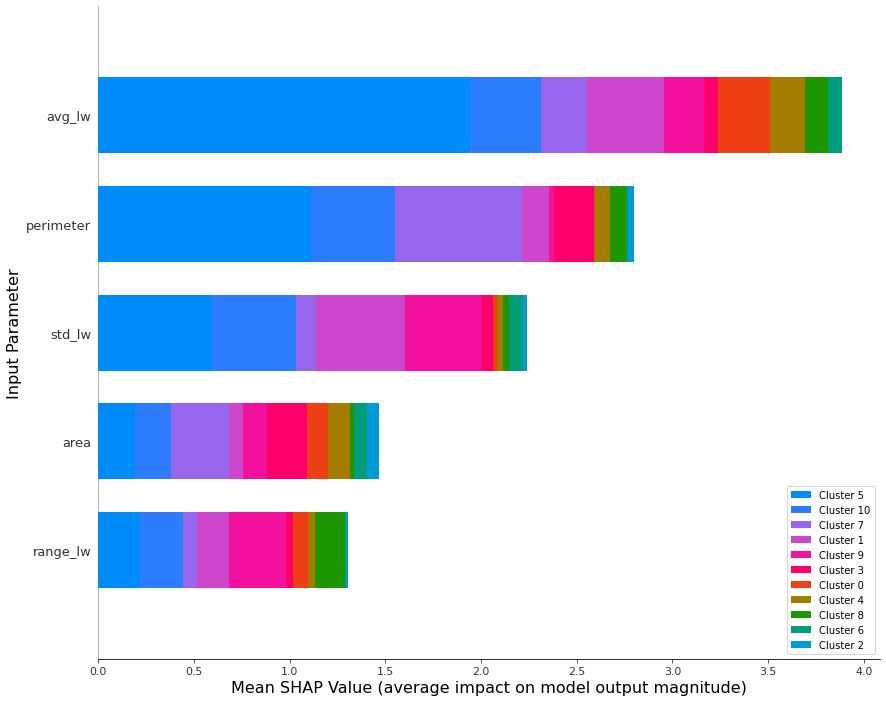

In [86]:
fig = shap.summary_plot(shap_values, X_test, show=False)
fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(14)
ax = plt.gca()
ax.set_xlabel('Mean SHAP Value (average impact on model output magnitude)', fontsize=16)
ax.set_ylabel('Input Parameter', fontsize=16)
ylabels = ([tick.get_text() for tick in ax.get_yticklabels()])

ax.set_yticklabels(ylabels)
leg = ax.legend()
for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Cluster'))
plt.show()

# Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [88]:
clf = DecisionTreeClassifier(random_state=42)

In [89]:
grid = {'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 13),
               'min_samples_leaf': [1, 2, 4],}

In [90]:
clf_random = GridSearchCV(estimator = clf, param_grid = grid, cv = 3, n_jobs = -2)
clf_random.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-2,
             param_grid={'max_depth': range(2, 13),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4]})

In [91]:
clf_random.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=42)

In [92]:
best_model = clf_random.best_estimator_
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.19555555555555557

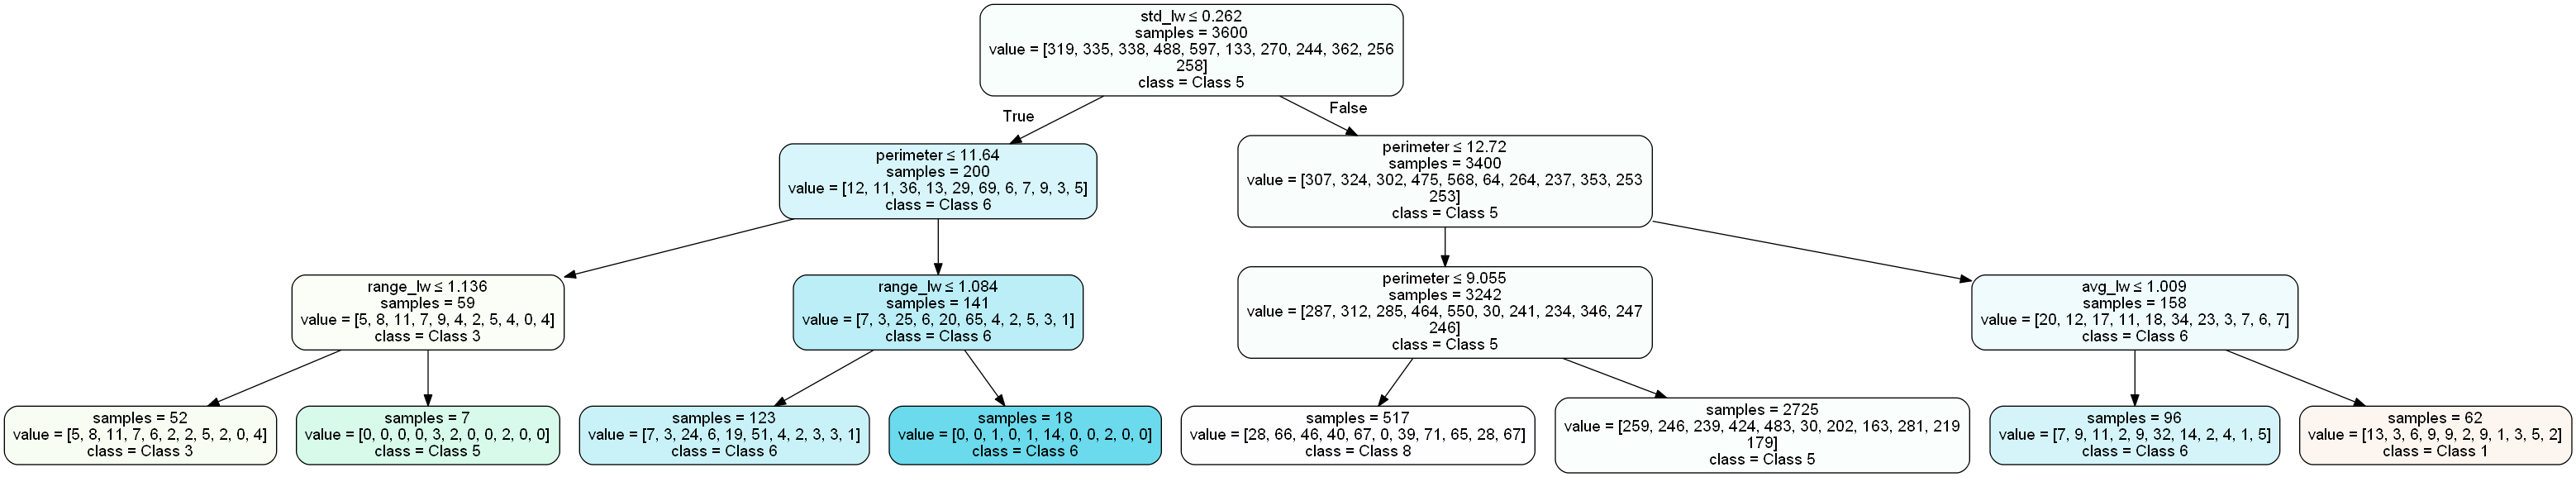

In [93]:
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(best_model, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10', 'Class 11'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [94]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X)

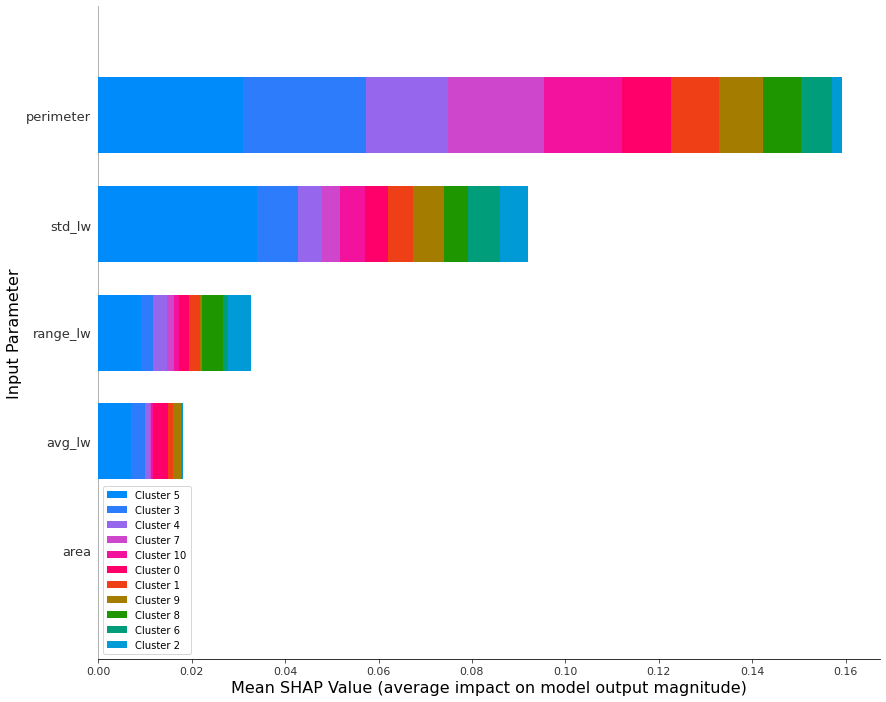

In [95]:
fig = shap.summary_plot(shap_values, X_test, show=False)
fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(14)
ax = plt.gca()
ax.set_xlabel('Mean SHAP Value (average impact on model output magnitude)', fontsize=16)
ax.set_ylabel('Input Parameter', fontsize=16)
ylabels = ([tick.get_text() for tick in ax.get_yticklabels()])

ax.set_yticklabels(ylabels)
leg = ax.legend()
for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Cluster'))
plt.show()

# Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()

In [98]:
grid = {'n_estimators': range(200, 2001, 200),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 15, 2),
               'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]}

In [99]:
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -2)
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-2)]: Done 132 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 15, 2),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': range(200, 2001, 200)},
                   random_state=42, verbose=2)

In [100]:
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 6,
 'bootstrap': True}

In [101]:
best_model = clf_random.best_estimator_
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.21222222222222223

In [102]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X)

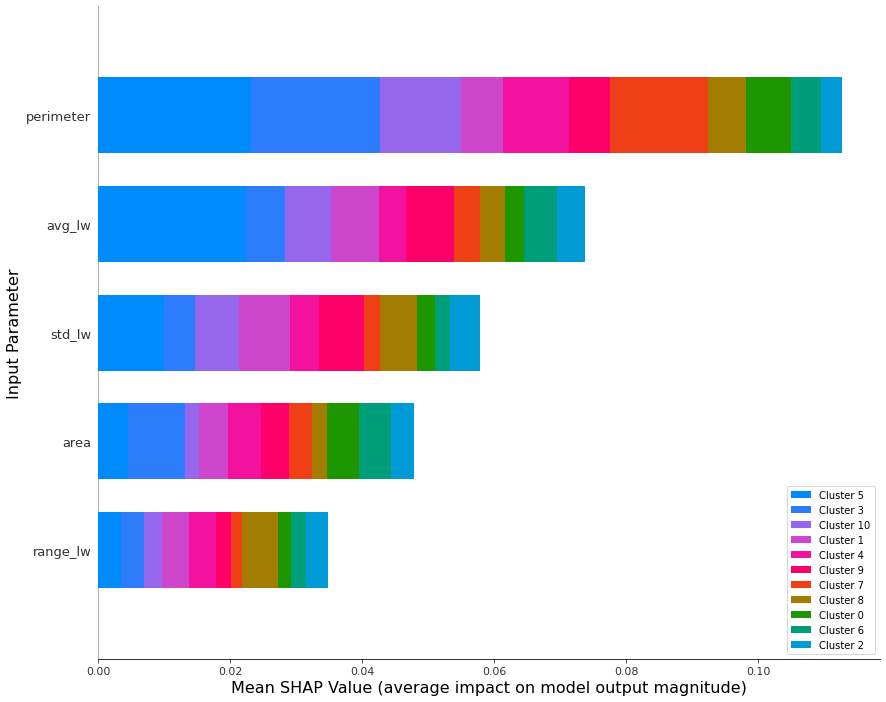

In [103]:
fig = shap.summary_plot(shap_values, X_test, show=False)
fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(14)
ax = plt.gca()
ax.set_xlabel('Mean SHAP Value (average impact on model output magnitude)', fontsize=16)
ax.set_ylabel('Input Parameter', fontsize=16)
ylabels = ([tick.get_text() for tick in ax.get_yticklabels()])

ax.set_yticklabels(ylabels)
leg = ax.legend()
for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Cluster'))
plt.show()

# SVM

In [104]:
from sklearn.svm import SVC

for k in ["linear", "poly", "rbf", "sigmoid"]:
    clf = make_pipeline(RobustScaler(), SVC(kernel=k, C=1.0, probability=True))
    clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

In [105]:
model = SVC(kernel="rbf", C=1.0, probability=True)
scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2

In [106]:
explainer = shap.KernelExplainer(model.predict_proba, X_train[:50])
shap_values = explainer.shap_values(X_test[:50], nsamples=100)

  0%|          | 0/50 [00:00<?, ?it/s]

shap.summary_plot(shap_values, X_test[:50])

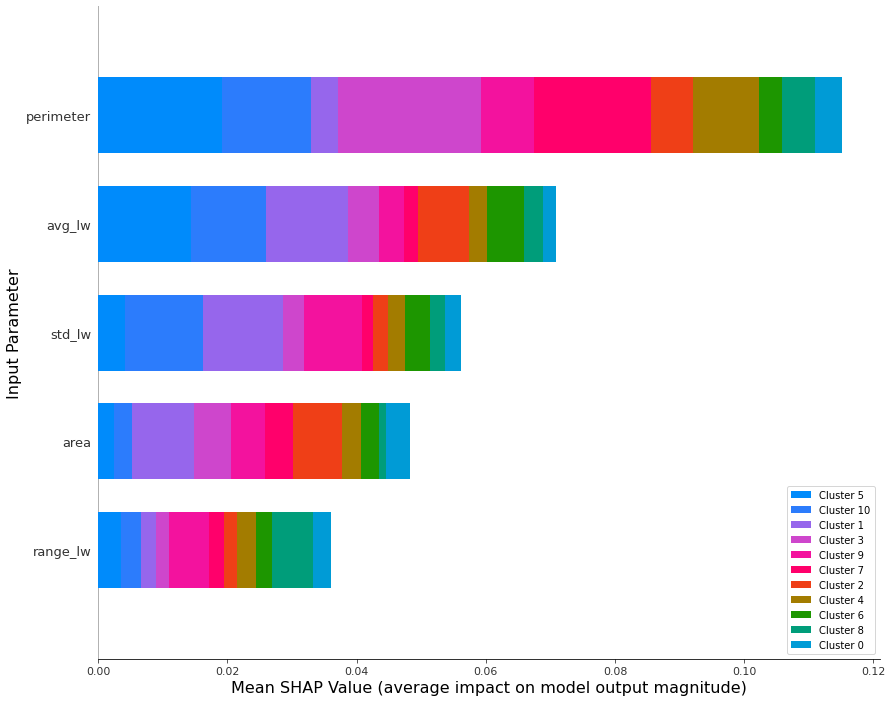

In [107]:
fig = shap.summary_plot(shap_values, X_test[:50], show=False)
fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(14)
ax = plt.gca()
ax.set_xlabel('Mean SHAP Value (average impact on model output magnitude)', fontsize=16)
ax.set_ylabel('Input Parameter', fontsize=16)
ylabels = ([tick.get_text() for tick in ax.get_yticklabels()])

ax.set_yticklabels(ylabels)
leg = ax.legend()
for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Cluster'))
plt.show()

# KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [110]:
neigh = KNeighborsClassifier()

In [111]:
grid = {"n_neighbors": range(2, 30), "weights": ["uniform", "distance"]}
neigh_random = GridSearchCV(estimator = neigh, param_grid = grid, cv = 3, n_jobs = -2)
neigh_random.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-2,
             param_grid={'n_neighbors': range(2, 30),
                         'weights': ['uniform', 'distance']})

In [112]:
neigh_random.best_estimator_

KNeighborsClassifier(n_neighbors=26, weights='distance')

In [113]:
best_model = neigh_random.best_estimator_
model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.19444444444444445

In [114]:
explainer = shap.KernelExplainer(best_model.predict_proba, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

  0%|          | 0/100 [00:00<?, ?it/s]

shap.summary_plot(shap_values, X_test[:100])

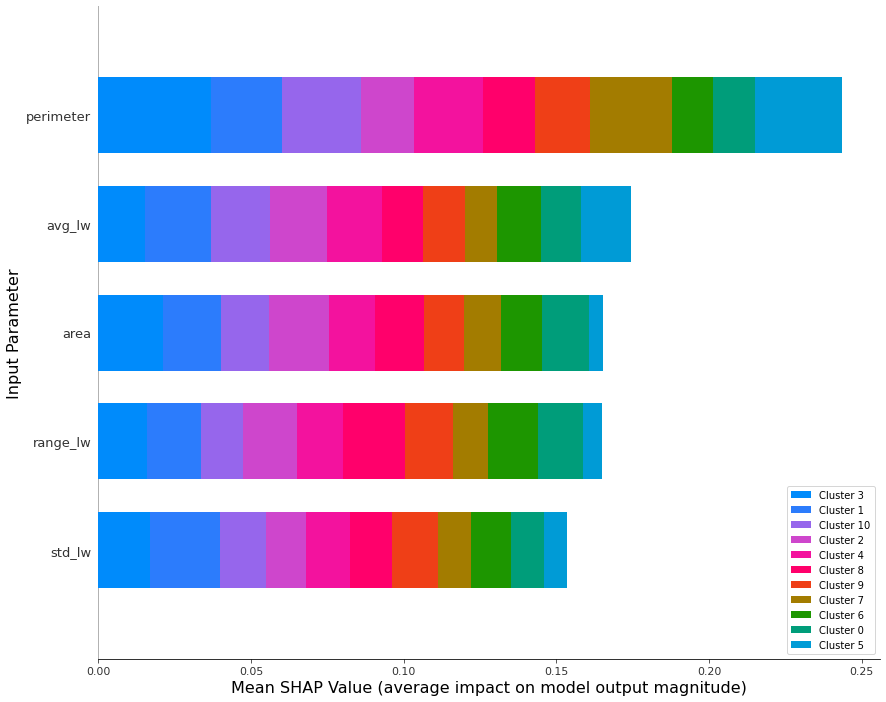

In [115]:
fig = shap.summary_plot(shap_values, X_test[:100], show=False)
fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(14)
ax = plt.gca()
ax.set_xlabel('Mean SHAP Value (average impact on model output magnitude)', fontsize=16)
ax.set_ylabel('Input Parameter', fontsize=16)
ylabels = ([tick.get_text() for tick in ax.get_yticklabels()])

ax.set_yticklabels(ylabels)
leg = ax.legend()
for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Cluster'))
plt.show()

# Part 3: Analysis to predict specific geometric features using latent space

# 1. Test Perimeter

In [151]:
#X = LatentSpace

X = LatentSpacePCADF.iloc[:,:50]
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.005596,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,0.780583,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,0.587116,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-2.517256,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,-2.524161,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.825062,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,3.432168,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-2.165442,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.516262,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380


In [152]:
# perimeter,  avg_lw, range_lw, std_lw

Y = GeometricData[['perimeter']].reset_index(drop=True)
Y

,perimeter
0,11.512384
1,8.267206
2,10.888162
3,9.853267
4,11.239347
...,...
44995,10.087881
44996,9.875311
44997,12.193813
44998,10.642547


In [153]:
Combined = pd.concat([X, Y], axis=1)
Combined

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,perimeter
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707,11.512384
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323,8.267206
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729,10.888162
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910,9.853267
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145,11.239347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300,10.087881
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697,9.875311
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818,12.193813
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380,10.642547


In [154]:
Combined_10per = Combined.sample(frac=0.1)
Combined_10per

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,perimeter
40997,-11.715592,9.899689,-7.468448,1.725333,-2.463751,-2.198605,3.465147,4.210146,-0.701698,-0.049290,...,-1.464295,-0.450573,-2.032854,0.114354,-0.038774,-0.985743,-0.209523,1.761145,1.838790,13.256002
6702,10.924572,-1.991992,-1.928474,-1.779203,1.825603,5.211855,-0.912376,1.628401,0.901531,-1.419802,...,-1.059867,-1.142349,-0.880109,-2.420177,-0.413967,1.559390,2.376408,-0.209760,-2.026581,9.135451
41270,9.077915,-3.442596,-4.102913,0.565497,8.239375,-3.967032,-3.676050,-2.302902,-1.365425,0.094757,...,0.175687,2.322771,-0.837197,0.339255,-0.794442,-1.528692,-2.550309,-0.047298,-2.327207,10.416312
42280,0.602117,5.134282,1.281979,-7.201188,0.593930,4.923458,-2.947476,-2.281812,6.962086,-5.148120,...,0.906639,1.406764,0.396593,2.414435,-0.014775,-3.466492,0.837773,2.122104,-0.101042,10.488438
39029,8.813626,2.404218,-6.230965,-4.337166,1.015851,4.554481,-3.675280,0.937581,-2.001204,-1.037488,...,-1.582643,1.753128,1.170848,-2.284156,0.030992,-0.522178,1.460528,0.876498,0.764364,13.550267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38668,-2.748398,-3.832548,0.266299,5.958317,-3.655059,7.929723,-1.741485,2.206615,-2.145368,-3.885437,...,-2.089253,2.077376,2.532729,-1.195814,0.350875,-1.062796,1.474541,-1.828480,-1.594048,10.988402
24805,7.966249,-1.077791,-4.266258,-1.872985,-5.218122,6.311363,0.440185,-2.213585,1.932784,-4.568903,...,1.109669,0.246307,1.638956,-1.307902,-0.013218,-1.380288,-0.753906,0.287070,1.371052,9.815677
2223,2.420470,3.186022,5.423827,-3.153931,0.644060,2.932037,-2.005581,-1.885154,5.076411,-0.355605,...,-0.347386,0.890426,-1.676155,-0.605820,2.350115,3.276742,1.448310,-2.637908,0.158199,10.348136
20300,1.149086,-5.992138,-0.813474,3.755826,0.046145,1.880986,-0.264303,0.258734,-7.443857,0.747962,...,-2.893886,0.677397,-4.558022,-1.991370,1.130583,3.074214,-0.911131,1.478427,0.281129,10.017064


In [155]:
Y = Combined_10per[['perimeter']].reset_index(drop=True)
Y

,perimeter
0,13.256002
1,9.135451
2,10.416312
3,10.488438
4,13.550267
...,...
4495,10.988402
4496,9.815677
4497,10.348136
4498,10.017064


In [156]:
X = Combined_10per.iloc[:,:50].reset_index(drop=True)
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-11.715592,9.899689,-7.468448,1.725333,-2.463751,-2.198605,3.465147,4.210146,-0.701698,-0.049290,...,-1.467666,-1.464295,-0.450573,-2.032854,0.114354,-0.038774,-0.985743,-0.209523,1.761145,1.838790
1,10.924572,-1.991992,-1.928474,-1.779203,1.825603,5.211855,-0.912376,1.628401,0.901531,-1.419802,...,-1.197768,-1.059867,-1.142349,-0.880109,-2.420177,-0.413967,1.559390,2.376408,-0.209760,-2.026581
2,9.077915,-3.442596,-4.102913,0.565497,8.239375,-3.967032,-3.676050,-2.302902,-1.365425,0.094757,...,1.061291,0.175687,2.322771,-0.837197,0.339255,-0.794442,-1.528692,-2.550309,-0.047298,-2.327207
3,0.602117,5.134282,1.281979,-7.201188,0.593930,4.923458,-2.947476,-2.281812,6.962086,-5.148120,...,-0.064667,0.906639,1.406764,0.396593,2.414435,-0.014775,-3.466492,0.837773,2.122104,-0.101042
4,8.813626,2.404218,-6.230965,-4.337166,1.015851,4.554481,-3.675280,0.937581,-2.001204,-1.037488,...,-0.406612,-1.582643,1.753128,1.170848,-2.284156,0.030992,-0.522178,1.460528,0.876498,0.764364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,-2.748398,-3.832548,0.266299,5.958317,-3.655059,7.929723,-1.741485,2.206615,-2.145368,-3.885437,...,0.986159,-2.089253,2.077376,2.532729,-1.195814,0.350875,-1.062796,1.474541,-1.828480,-1.594048
4496,7.966249,-1.077791,-4.266258,-1.872985,-5.218122,6.311363,0.440185,-2.213585,1.932784,-4.568903,...,0.173304,1.109669,0.246307,1.638956,-1.307902,-0.013218,-1.380288,-0.753906,0.287070,1.371052
4497,2.420470,3.186022,5.423827,-3.153931,0.644060,2.932037,-2.005581,-1.885154,5.076411,-0.355605,...,-0.623377,-0.347386,0.890426,-1.676155,-0.605820,2.350115,3.276742,1.448310,-2.637908,0.158199
4498,1.149086,-5.992138,-0.813474,3.755826,0.046145,1.880986,-0.264303,0.258734,-7.443857,0.747962,...,1.442747,-2.893886,0.677397,-4.558022,-1.991370,1.130583,3.074214,-0.911131,1.478427,0.281129


In [157]:
#Baseline test - zero_rule_algorithm_regression

from random import seed
from random import randrange
 
# zero rule algorithm for regression
def zero_rule_algorithm_regression(train, test):
    output_values = [row[-1] for row in train]
    prediction = sum(output_values) / float(len(output_values))
    predicted = [prediction for i in range(len(test))]
    return predicted
 
seed(1)

train = Y['perimeter'].to_list() # change attribute
test = [None] * 4500 # change number of rows

def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_ZeroR_Regression = zero_rule_algorithm_regression(train_nested, test_nested)

r2_score(train, Y_ZeroR_Regression)

0.0

In [158]:
train_nested

[[13.25600215047598],
 [9.135450743138788],
 [10.416311528533695],
 [10.488437741994858],
 [13.55026726424694],
 [9.036081567406654],
 [11.72147335857153],
 [13.297839604318142],
 [8.656122821383178],
 [10.9550442956388],
 [9.237205360084774],
 [11.53903854638338],
 [11.972043618559836],
 [9.094129901379349],
 [9.55502114072442],
 [9.676545895636082],
 [11.4544247277081],
 [9.19739593565464],
 [11.464697554707527],
 [10.008790001273155],
 [10.063362888991833],
 [10.552408486604689],
 [9.811987228691578],
 [14.689099874347448],
 [11.278744857758284],
 [10.320809863507748],
 [10.248969372361898],
 [12.19454175233841],
 [10.486445680260658],
 [8.581738319247961],
 [10.571846518665552],
 [9.494316661730409],
 [9.957946114242077],
 [10.314309742301704],
 [12.125012703239918],
 [8.484860375523567],
 [8.906972900032999],
 [8.7675596550107],
 [12.72739787772298],
 [8.820594688877463],
 [11.479711815714836],
 [8.998328329995276],
 [10.066116854548453],
 [11.451884839683771],
 [11.20112084969878

In [159]:
test_nested

[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 

In [160]:
Y_ZeroR_Regression

[10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355144467,
 10.480556355

In [161]:
train

[13.25600215047598,
 9.135450743138788,
 10.416311528533695,
 10.488437741994858,
 13.55026726424694,
 9.036081567406654,
 11.72147335857153,
 13.297839604318142,
 8.656122821383178,
 10.9550442956388,
 9.237205360084774,
 11.53903854638338,
 11.972043618559836,
 9.094129901379349,
 9.55502114072442,
 9.676545895636082,
 11.4544247277081,
 9.19739593565464,
 11.464697554707527,
 10.008790001273155,
 10.063362888991833,
 10.552408486604689,
 9.811987228691578,
 14.689099874347448,
 11.278744857758284,
 10.320809863507748,
 10.248969372361898,
 12.19454175233841,
 10.486445680260658,
 8.581738319247961,
 10.571846518665552,
 9.494316661730409,
 9.957946114242077,
 10.314309742301704,
 12.125012703239918,
 8.484860375523567,
 8.906972900032999,
 8.7675596550107,
 12.72739787772298,
 8.820594688877463,
 11.479711815714836,
 8.998328329995276,
 10.066116854548453,
 11.451884839683771,
 11.201120849698784,
 10.698085382580755,
 9.730253193527462,
 9.207745660096409,
 9.949377350509168,
 9.42

In [162]:
r2_score(train, Y_ZeroR_Regression)

0.0

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(train, Y_ZeroR_Regression))
print(math.sqrt(mean_squared_error(train, Y_ZeroR_Regression)))
print(mean_absolute_error(train, Y_ZeroR_Regression))

2.181210450226062
1.4768921593082083
1.1229146110480361


## Linear Regression

In [164]:
# rename columns

Combined.columns=["C"+str(i) for i in range(1, len(Combined.columns) + 1)]
Combined = Combined.rename(columns={'C51': 'perimeter'})
Combined

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C42,C43,C44,C45,C46,C47,C48,C49,C50,perimeter
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707,11.512384
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323,8.267206
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729,10.888162
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910,9.853267
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145,11.239347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300,10.087881
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697,9.875311
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818,12.193813
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380,10.642547


In [165]:
print('+'.join(str(i) for i in Combined.iloc[:,:50].columns))

C1+C2+C3+C4+C5+C6+C7+C8+C9+C10+C11+C12+C13+C14+C15+C16+C17+C18+C19+C20+C21+C22+C23+C24+C25+C26+C27+C28+C29+C30+C31+C32+C33+C34+C35+C36+C37+C38+C39+C40+C41+C42+C43+C44+C45+C46+C47+C48+C49+C50


In [166]:
features = ('+'.join(str(i) for i in Combined.iloc[:,:50].columns))
features

'C1+C2+C3+C4+C5+C6+C7+C8+C9+C10+C11+C12+C13+C14+C15+C16+C17+C18+C19+C20+C21+C22+C23+C24+C25+C26+C27+C28+C29+C30+C31+C32+C33+C34+C35+C36+C37+C38+C39+C40+C41+C42+C43+C44+C45+C46+C47+C48+C49+C50'

In [167]:
lm = smf.ols(formula='perimeter ~' + features + '-1', data = Combined).fit()
print(lm.summary())

Combined['predicted']=lm.predict()

#fig, ax = plt.subplots() #get axis to plot on
#Combined.plot(ax=ax,kind='scatter',x='C1', y='perimeter') #show the data
#ax.plot(Combined['C1'],Combined['predicted'],'r-'); #show the regression line

                                 OLS Regression Results                                
Dep. Variable:              perimeter   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              10.81
Date:                Wed, 21 Jul 2021   Prob (F-statistic):                    6.88e-83
Time:                        16:13:33   Log-Likelihood:                     -1.6975e+05
No. Observations:               45000   AIC:                                  3.396e+05
Df Residuals:                   44950   BIC:                                  3.400e+05
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [168]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(Combined['perimeter'], Combined['predicted']))
print(math.sqrt(mean_squared_error(Combined['perimeter'], Combined['predicted'])))
print(mean_absolute_error(Combined['perimeter'], Combined['predicted']))

110.67930246667406
10.520423112530887
10.481145966577726


## Decision Tree

In [124]:
scaler = RobustScaler()

In [125]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [126]:
clf = tree.DecisionTreeRegressor(random_state=42)

In [127]:
grid = {'criterion': ["mse", "friedman_mse", "mae", "poisson"],
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 18),
               'min_samples_leaf': [1, 2, 4, 6, 10],}

grid = {'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 18),
               'min_samples_leaf': [1, 2, 4, 6, 10],}

In [128]:
clf_random = GridSearchCV(estimator = clf, param_grid = grid, cv = 2, n_jobs = -2)

In [129]:
clf_random.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-2,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(2, 18),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6, 10]})

In [130]:
clf_random.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
                      min_samples_leaf=2, random_state=42)

In [131]:
best_model = clf_random.best_estimator_

In [132]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)

0.3096858551585441

In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

1.5779287193954254
1.256156327610312
0.940289690220832


explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

## Random Forest

In [134]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [135]:
rf = RandomForestRegressor()

In [136]:
grid = {'n_estimators': range(200, 6001, 200),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 30, 2),
               'min_samples_leaf': [1, 2, 4, 6, 8],
            'bootstrap': [True, False]}

In [137]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 20, cv = 2, verbose=2, random_state=42, n_jobs = -2)

In [138]:
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-2)]: Done  32 out of  40 | elapsed:  1.7min remaining:   25.5s
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed:  5.3min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 30, 2),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'n_estimators': range(200, 6001, 200)},
                   random_state=42, verbose=2)

In [139]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 18,
 'bootstrap': True}

In [140]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)
r2_score(y_test, y_pred)

0.4990138571142355

In [141]:
model = rf_random.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.5576068761856954

In [142]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

1.011227743985996
1.0055982020598466
0.7715585411628457


explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

## SVM

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [144]:
#parameters = [{'kernel': ["linear", "poly", "rbf", "sigmoid"], 'gamma': [1e-3, 0.01, 0.1, 0.2, 0.5, 0.9],'C': [1, 10, 100, 1000], 'epsilon': [ 1000, 100, 10, 1, 0.1, 0.01, 0.001]}]
parameters = [{'kernel': ["rbf"], 'gamma': [1e-3, 0.01, 0.1, 0.2, 0.5, 0.9],'C': [1, 10, 100, 1000], 'epsilon': [ 1000, 100, 10, 1, 0.1, 0.01, 0.001]}]

model = GridSearchCV(SVR(), parameters, cv = 2, n_jobs = -2)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)
grid_result = model.fit(X_train, y_train)

best_params = grid_result.best_params_
print(best_params)

{'C': 10, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [145]:
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.6938424271172863


In [146]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

0.6998188151323254
0.8365517408578655
0.6579864883526412


explainer = shap.KernelExplainer(model.predict, X_train[:50])
shap_values = explainer.shap_values(X_test[:50], nsamples=100)

shap.summary_plot(shap_values, X_test[:50])

## KNN

In [147]:
from sklearn.neighbors import KNeighborsRegressor

In [148]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [149]:
neigh = KNeighborsRegressor()

In [150]:
grid = {"n_neighbors": range(2, 40), "weights": ["uniform", "distance"], "metric":['euclidean', 'manhattan']}
neigh_random = GridSearchCV(estimator = neigh, param_grid = grid, cv = 2, n_jobs = -1)

In [151]:
neigh_random.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [152]:
neigh_random.best_estimator_

KNeighborsRegressor(metric='euclidean', n_neighbors=16, weights='distance')

In [153]:
best_model = neigh_random.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)

0.43934311888705635

In [154]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

1.281556521832482
1.1320585328650115
0.8654629246557436


explainer = shap.KernelExplainer(best_model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

shap.summary_plot(shap_values, X_test[:100])

# 2. Test avg_lw

In [169]:
#X = LatentSpace

X = LatentSpacePCADF.iloc[:,:50]
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.005596,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,0.780583,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,0.587116,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-2.517256,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,-2.524161,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.825062,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,3.432168,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-2.165442,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.516262,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380


In [170]:
# perimeter, avg_lw, range_lw, std_lw

Y = GeometricData[['avg_lw']].reset_index(drop=True)
Y

,avg_lw
0,0.612699
1,1.439193
2,1.685483
3,1.231770
4,0.767389
...,...
44995,0.966989
44996,0.542330
44997,0.345635
44998,0.826792


In [171]:
Combined = pd.concat([X, Y], axis=1)
Combined

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,avg_lw
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707,0.612699
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323,1.439193
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729,1.685483
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910,1.231770
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145,0.767389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300,0.966989
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697,0.542330
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818,0.345635
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380,0.826792


In [172]:
Combined_10per = Combined.sample(frac=0.1)
Combined_10per

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,avg_lw
21178,4.506474,1.887849,0.852916,0.603459,0.096448,-0.316562,-3.769849,-0.077662,-2.592147,1.609336,...,0.690484,-1.568392,0.952848,-4.034554,0.679757,1.879858,-2.855951,0.281439,0.053112,1.180788
35547,-5.071285,-2.873423,-4.526354,14.282654,3.119847,-1.206953,3.751891,4.889012,2.032268,4.617291,...,0.670226,-2.673281,0.870732,-0.297135,0.473640,-0.984241,2.966822,0.775374,-1.474035,1.198346
44790,-2.147649,1.909501,2.424587,3.493861,0.527981,2.686041,-1.195553,-6.991392,1.189585,1.578271,...,-0.144118,1.266609,0.187488,0.770530,-0.195493,1.504418,-1.121440,1.116873,2.415889,0.967317
44924,3.410892,4.154364,2.397172,4.008015,-1.919662,3.113539,-3.584811,-2.346825,-3.427027,0.605276,...,-0.781456,0.691172,-0.883872,1.920251,-0.009394,0.268726,-2.101603,1.551976,-2.095954,1.147101
35132,-5.115899,-2.192498,5.758139,-3.353615,-1.012819,-4.983697,-0.979587,-2.388437,0.236150,2.932871,...,1.922232,2.618099,0.491944,1.217446,-0.012733,-0.081829,0.483177,-1.716563,-0.571784,1.187512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44012,9.152350,1.312910,-1.273449,1.576480,-1.332188,-7.490809,3.277671,-1.438257,1.253742,-2.394374,...,-0.812917,0.444627,-0.678326,-0.717008,-0.846338,-0.534496,-0.115678,-1.485394,1.244070,0.527464
34602,-6.256514,-5.364024,1.928233,-5.811494,2.525371,1.493285,-2.501987,0.451054,-2.110234,0.813529,...,0.449131,0.942155,-0.096422,-2.047410,1.952739,-1.675116,-1.429575,-1.846059,1.751962,1.356279
15379,-8.359653,-4.554036,-3.603828,-7.158972,-1.406238,-0.199575,3.761380,-2.826322,-2.366852,0.003072,...,0.519121,-0.841500,0.624162,-0.600142,0.082604,0.419352,0.141912,-0.954603,-0.607408,0.733513
932,6.652553,0.620811,-0.317641,-3.723866,-1.221784,6.588479,2.020557,0.994109,-0.459153,1.246643,...,-3.768883,1.232004,-0.625764,-0.850998,-0.426181,-1.395376,-0.693428,1.264394,-0.078454,1.083441


In [173]:
Y = Combined_10per[['avg_lw']].reset_index(drop=True)
Y

,avg_lw
0,1.180788
1,1.198346
2,0.967317
3,1.147101
4,1.187512
...,...
4495,0.527464
4496,1.356279
4497,0.733513
4498,1.083441


In [174]:
X = Combined_10per.iloc[:,:50].reset_index(drop=True)
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,4.506474,1.887849,0.852916,0.603459,0.096448,-0.316562,-3.769849,-0.077662,-2.592147,1.609336,...,1.388863,0.690484,-1.568392,0.952848,-4.034554,0.679757,1.879858,-2.855951,0.281439,0.053112
1,-5.071285,-2.873423,-4.526354,14.282654,3.119847,-1.206953,3.751891,4.889012,2.032268,4.617291,...,-0.510228,0.670226,-2.673281,0.870732,-0.297135,0.473640,-0.984241,2.966822,0.775374,-1.474035
2,-2.147649,1.909501,2.424587,3.493861,0.527981,2.686041,-1.195553,-6.991392,1.189585,1.578271,...,0.714711,-0.144118,1.266609,0.187488,0.770530,-0.195493,1.504418,-1.121440,1.116873,2.415889
3,3.410892,4.154364,2.397172,4.008015,-1.919662,3.113539,-3.584811,-2.346825,-3.427027,0.605276,...,-1.000320,-0.781456,0.691172,-0.883872,1.920251,-0.009394,0.268726,-2.101603,1.551976,-2.095954
4,-5.115899,-2.192498,5.758139,-3.353615,-1.012819,-4.983697,-0.979587,-2.388437,0.236150,2.932871,...,-0.549319,1.922232,2.618099,0.491944,1.217446,-0.012733,-0.081829,0.483177,-1.716563,-0.571784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,9.152350,1.312910,-1.273449,1.576480,-1.332188,-7.490809,3.277671,-1.438257,1.253742,-2.394374,...,0.442930,-0.812917,0.444627,-0.678326,-0.717008,-0.846338,-0.534496,-0.115678,-1.485394,1.244070
4496,-6.256514,-5.364024,1.928233,-5.811494,2.525371,1.493285,-2.501987,0.451054,-2.110234,0.813529,...,1.113406,0.449131,0.942155,-0.096422,-2.047410,1.952739,-1.675116,-1.429575,-1.846059,1.751962
4497,-8.359653,-4.554036,-3.603828,-7.158972,-1.406238,-0.199575,3.761380,-2.826322,-2.366852,0.003072,...,0.772353,0.519121,-0.841500,0.624162,-0.600142,0.082604,0.419352,0.141912,-0.954603,-0.607408
4498,6.652553,0.620811,-0.317641,-3.723866,-1.221784,6.588479,2.020557,0.994109,-0.459153,1.246643,...,0.072420,-3.768883,1.232004,-0.625764,-0.850998,-0.426181,-1.395376,-0.693428,1.264394,-0.078454


In [175]:
#Baseline test - zero_rule_algorithm_regression

from random import seed
from random import randrange
 
# zero rule algorithm for regression
def zero_rule_algorithm_regression(train, test):
    output_values = [row[-1] for row in train]
    prediction = sum(output_values) / float(len(output_values))
    predicted = [prediction for i in range(len(test))]
    return predicted
 
seed(1)

train = Y['avg_lw'].to_list() # change attribute
test = [None] * 4500 # change number of rows

def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_ZeroR_Regression = zero_rule_algorithm_regression(train_nested, test_nested)

r2_score(train, Y_ZeroR_Regression)

0.0

In [176]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(train, Y_ZeroR_Regression))
print(math.sqrt(mean_squared_error(train, Y_ZeroR_Regression)))
print(mean_absolute_error(train, Y_ZeroR_Regression))

0.2545766573455406
0.5045559011106109
0.39257810871645404


## Linear Regression

In [177]:
# rename columns

Combined.columns=["C"+str(i) for i in range(1, len(Combined.columns) + 1)]
Combined = Combined.rename(columns={'C51': 'avg_lw'})
Combined

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C42,C43,C44,C45,C46,C47,C48,C49,C50,avg_lw
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707,0.612699
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323,1.439193
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729,1.685483
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910,1.231770
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145,0.767389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300,0.966989
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697,0.542330
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818,0.345635
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380,0.826792


In [178]:
features = ('+'.join(str(i) for i in Combined.iloc[:,:50].columns))
features

'C1+C2+C3+C4+C5+C6+C7+C8+C9+C10+C11+C12+C13+C14+C15+C16+C17+C18+C19+C20+C21+C22+C23+C24+C25+C26+C27+C28+C29+C30+C31+C32+C33+C34+C35+C36+C37+C38+C39+C40+C41+C42+C43+C44+C45+C46+C47+C48+C49+C50'

In [179]:
lm = smf.ols(formula='avg_lw ~' + features + '-1', data = Combined).fit()
print(lm.summary())

Combined['predicted']=lm.predict()

#fig, ax = plt.subplots() #get axis to plot on
#Combined.plot(ax=ax,kind='scatter',x='C1', y='perimeter') #show the data
#ax.plot(Combined['C1'],Combined['predicted'],'r-'); #show the regression line

                                 OLS Regression Results                                
Dep. Variable:                 avg_lw   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.128
Method:                 Least Squares   F-statistic:                              132.8
Date:                Wed, 21 Jul 2021   Prob (F-statistic):                        0.00
Time:                        16:25:47   Log-Likelihood:                         -69941.
No. Observations:               45000   AIC:                                  1.400e+05
Df Residuals:                   44950   BIC:                                  1.404e+05
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [180]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(Combined['avg_lw'], Combined['predicted']))
print(math.sqrt(mean_squared_error(Combined['avg_lw'], Combined['predicted'])))
print(mean_absolute_error(Combined['avg_lw'], Combined['predicted']))

1.3107528509968565
1.1448811514724384
1.1219053850295961


## Decision Tree

In [163]:
scaler = RobustScaler()

In [164]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [165]:
clf = tree.DecisionTreeRegressor(random_state=42)

In [166]:
grid = {'criterion': ["mse", "friedman_mse", "mae", "poisson"],
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 18),
               'min_samples_leaf': [1, 2, 4, 6, 10],}

grid = {'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 18),
               'min_samples_leaf': [1, 2, 4, 6, 10],}

In [167]:
clf_random = GridSearchCV(estimator = clf, param_grid = grid, cv = 2, n_jobs = -2)

In [168]:
clf_random.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-2,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(2, 18),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6, 10]})

In [169]:
clf_random.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=10,
                      random_state=42)

In [170]:
best_model = clf_random.best_estimator_

In [171]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)

0.5585913547876982

In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

0.11724956739143494
0.3424172416678736
0.2648188468353556


explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

## Random Forest

In [173]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [174]:
rf = RandomForestRegressor()

In [175]:
grid = {'n_estimators': range(200, 6001, 200),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 30, 2),
               'min_samples_leaf': [1, 2, 4, 6, 8],
            'bootstrap': [True, False]}

In [176]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 20, cv = 2, verbose=2, random_state=42, n_jobs = -2)

In [177]:
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-2)]: Done  32 out of  40 | elapsed:  1.7min remaining:   25.5s
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed:  4.9min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 30, 2),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'n_estimators': range(200, 6001, 200)},
                   random_state=42, verbose=2)

In [178]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 18,
 'bootstrap': True}

In [179]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)
r2_score(y_test, y_pred)

0.6699318118112743

In [180]:
model = rf_random.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.6978816179769807

In [181]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

0.08025046626842113
0.2832851324521305
0.21498738646312174


explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

## SVM

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [183]:
#parameters = [{'kernel': ["linear", "poly", "rbf", "sigmoid"], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000], 'epsilon': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]
parameters = [{'kernel': ["rbf"], 'gamma': [1e-3, 0.01, 0.1, 0.2, 0.5, 0.9],'C': [1, 10, 100, 1000], 'epsilon': [ 1000, 100, 10, 1, 0.1, 0.01, 0.001]}]

model = GridSearchCV(SVR(), parameters, cv = 2, n_jobs = -2)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)
grid_result = model.fit(X_train, y_train)

best_params = grid_result.best_params_
print(best_params)

{'C': 1, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [184]:
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.8087876843936148


In [185]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

0.05079094287784096
0.2253684602552916
0.16762619360089742


explainer = shap.KernelExplainer(model.predict, X_train[:50])
shap_values = explainer.shap_values(X_test[:50], nsamples=100)

shap.summary_plot(shap_values, X_test[:50])

## KNN

In [186]:
from sklearn.neighbors import KNeighborsRegressor

In [187]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [188]:
neigh = KNeighborsRegressor()

In [189]:
grid = {"n_neighbors": range(2, 40), "weights": ["uniform", "distance"], "metric":['euclidean', 'manhattan']}
neigh_random = GridSearchCV(estimator = neigh, param_grid = grid, cv = 2, n_jobs = -1)

In [190]:
neigh_random.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [191]:
neigh_random.best_estimator_

KNeighborsRegressor(metric='euclidean', n_neighbors=16, weights='distance')

In [192]:
best_model = neigh_random.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)

0.4950814387816257

In [193]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

0.13411944580805918
0.36622321855401135
0.28029041307079305


explainer = shap.KernelExplainer(best_model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

shap.summary_plot(shap_values, X_test[:100])

# 3. Test std_lw

In [181]:
#X = LatentSpace

X = LatentSpacePCADF.iloc[:,:50]
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.005596,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,0.780583,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,0.587116,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-2.517256,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,-2.524161,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.825062,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,3.432168,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-2.165442,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.516262,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380


In [182]:
# perimeter, avg_lw, range_lw, std_lw

Y = GeometricData[['std_lw']].reset_index(drop=True)
Y

,std_lw
0,0.746051
1,1.032524
2,1.243508
3,1.466105
4,0.729433
...,...
44995,1.001432
44996,0.296419
44997,0.219404
44998,1.076630


In [183]:
Combined = pd.concat([X, Y], axis=1)
Combined

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,std_lw
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707,0.746051
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323,1.032524
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729,1.243508
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910,1.466105
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145,0.729433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300,1.001432
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697,0.296419
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818,0.219404
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380,1.076630


In [184]:
Combined_10per = Combined.sample(frac=0.1)
Combined_10per

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,std_lw
36224,9.928851,-1.990970,2.315740,2.107254,1.037526,0.047245,2.220953,-3.097639,-2.573556,-3.339345,...,-0.655446,-0.898018,0.497432,0.374092,-0.378075,0.585711,-0.298217,-0.735344,-1.944288,1.382414
13823,4.078124,-3.077648,5.371611,-4.115882,-3.515325,0.965233,2.241947,0.674130,-4.593384,-4.041029,...,-1.407321,-1.537884,-0.598254,-3.282887,2.418480,-0.550598,-1.793990,0.776136,0.549481,0.999474
8272,1.848548,1.090467,-1.523804,-8.900834,3.732181,-2.494374,3.548530,2.381339,2.023915,-1.141206,...,0.341188,0.809673,-0.798021,0.072087,4.025918,-3.852322,-1.607001,-2.004550,1.427816,0.793698
28581,-6.016440,-0.030001,-1.646442,-3.896108,1.538837,-2.694731,4.319904,1.169702,-4.280231,-3.391294,...,0.759125,2.772003,0.176637,0.001166,-0.158830,0.098036,-0.872853,-0.330049,-0.636218,1.099408
4444,-2.086471,-2.172497,-4.888872,6.016984,0.248989,-3.621636,-3.385375,1.675827,-0.433249,1.816997,...,-0.992231,1.066839,-0.290033,1.663011,-0.907465,0.697593,1.284254,-1.462885,-1.422062,1.621408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30956,-1.489356,-3.434151,-3.721042,4.817023,0.209556,0.923879,-2.871875,-0.456136,0.994538,-1.704220,...,1.253647,3.156346,1.078265,2.159038,0.884712,-2.814193,1.385966,-1.522796,-2.053665,0.952919
18825,-5.795885,-0.767108,0.211185,1.212828,-2.689686,-8.762986,0.961597,-2.809241,5.555072,-2.176235,...,2.446170,-1.862697,-0.058316,-0.528568,-0.327265,2.053035,1.545613,0.406401,-1.204455,0.795778
13124,3.436494,3.579021,-1.709366,2.996385,-2.710290,-3.388448,-3.217538,-4.477754,-1.451975,1.109426,...,-0.074385,2.069183,0.354630,0.389886,-1.509609,-0.873013,0.119281,-2.032159,3.066674,0.210684
24954,9.817819,5.114587,0.274411,2.997656,8.147267,8.852469,4.655045,0.253933,-4.193566,1.564566,...,1.047253,-0.566340,2.956788,-0.339827,-0.603578,2.445387,0.498860,-2.284873,3.683466,0.702315


In [185]:
Y = Combined_10per[['std_lw']].reset_index(drop=True)
Y

,std_lw
0,1.382414
1,0.999474
2,0.793698
3,1.099408
4,1.621408
...,...
4495,0.952919
4496,0.795778
4497,0.210684
4498,0.702315


In [186]:
X = Combined_10per.iloc[:,:50].reset_index(drop=True)
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,9.928851,-1.990970,2.315740,2.107254,1.037526,0.047245,2.220953,-3.097639,-2.573556,-3.339345,...,-0.681846,-0.655446,-0.898018,0.497432,0.374092,-0.378075,0.585711,-0.298217,-0.735344,-1.944288
1,4.078124,-3.077648,5.371611,-4.115882,-3.515325,0.965233,2.241947,0.674130,-4.593384,-4.041029,...,-0.117720,-1.407321,-1.537884,-0.598254,-3.282887,2.418480,-0.550598,-1.793990,0.776136,0.549481
2,1.848548,1.090467,-1.523804,-8.900834,3.732181,-2.494374,3.548530,2.381339,2.023915,-1.141206,...,-3.129951,0.341188,0.809673,-0.798021,0.072087,4.025918,-3.852322,-1.607001,-2.004550,1.427816
3,-6.016440,-0.030001,-1.646442,-3.896108,1.538837,-2.694731,4.319904,1.169702,-4.280231,-3.391294,...,0.150253,0.759125,2.772003,0.176637,0.001166,-0.158830,0.098036,-0.872853,-0.330049,-0.636218
4,-2.086471,-2.172497,-4.888872,6.016984,0.248989,-3.621636,-3.385375,1.675827,-0.433249,1.816997,...,-0.719283,-0.992231,1.066839,-0.290033,1.663011,-0.907465,0.697593,1.284254,-1.462885,-1.422062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,-1.489356,-3.434151,-3.721042,4.817023,0.209556,0.923879,-2.871875,-0.456136,0.994538,-1.704220,...,-0.479295,1.253647,3.156346,1.078265,2.159038,0.884712,-2.814193,1.385966,-1.522796,-2.053665
4496,-5.795885,-0.767108,0.211185,1.212828,-2.689686,-8.762986,0.961597,-2.809241,5.555072,-2.176235,...,1.307098,2.446170,-1.862697,-0.058316,-0.528568,-0.327265,2.053035,1.545613,0.406401,-1.204455
4497,3.436494,3.579021,-1.709366,2.996385,-2.710290,-3.388448,-3.217538,-4.477754,-1.451975,1.109426,...,3.109282,-0.074385,2.069183,0.354630,0.389886,-1.509609,-0.873013,0.119281,-2.032159,3.066674
4498,9.817819,5.114587,0.274411,2.997656,8.147267,8.852469,4.655045,0.253933,-4.193566,1.564566,...,2.324619,1.047253,-0.566340,2.956788,-0.339827,-0.603578,2.445387,0.498860,-2.284873,3.683466


In [187]:
#Baseline test - zero_rule_algorithm_regression

from random import seed
from random import randrange
 
# zero rule algorithm for regression
def zero_rule_algorithm_regression(train, test):
    output_values = [row[-1] for row in train]
    prediction = sum(output_values) / float(len(output_values))
    predicted = [prediction for i in range(len(test))]
    return predicted
 
seed(1)

train = Y['std_lw'].to_list() # change attribute
test = [None] * 4500 # change number of rows

def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_ZeroR_Regression = zero_rule_algorithm_regression(train_nested, test_nested)

r2_score(train, Y_ZeroR_Regression)

0.0

In [188]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(train, Y_ZeroR_Regression))
print(math.sqrt(mean_squared_error(train, Y_ZeroR_Regression)))
print(mean_absolute_error(train, Y_ZeroR_Regression))

0.15550589736360337
0.3943423606000291
0.31205340376094975


## Linear Regression

In [189]:
# rename columns

Combined.columns=["C"+str(i) for i in range(1, len(Combined.columns) + 1)]
Combined = Combined.rename(columns={'C51': 'std_lw'})
Combined

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C42,C43,C44,C45,C46,C47,C48,C49,C50,std_lw
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707,0.746051
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323,1.032524
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729,1.243508
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910,1.466105
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145,0.729433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300,1.001432
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697,0.296419
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818,0.219404
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380,1.076630


In [190]:
features = ('+'.join(str(i) for i in Combined.iloc[:,:50].columns))
features

'C1+C2+C3+C4+C5+C6+C7+C8+C9+C10+C11+C12+C13+C14+C15+C16+C17+C18+C19+C20+C21+C22+C23+C24+C25+C26+C27+C28+C29+C30+C31+C32+C33+C34+C35+C36+C37+C38+C39+C40+C41+C42+C43+C44+C45+C46+C47+C48+C49+C50'

In [191]:
lm = smf.ols(formula='std_lw ~' + features + '-1', data = Combined).fit()
print(lm.summary())

Combined['predicted']=lm.predict()

#fig, ax = plt.subplots() #get axis to plot on
#Combined.plot(ax=ax,kind='scatter',x='C1', y='perimeter') #show the data
#ax.plot(Combined['C1'],Combined['predicted'],'r-'); #show the regression line

                                 OLS Regression Results                                
Dep. Variable:                 std_lw   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.063
Method:                 Least Squares   F-statistic:                              61.23
Date:                Wed, 21 Jul 2021   Prob (F-statistic):                        0.00
Time:                        16:26:54   Log-Likelihood:                         -64098.
No. Observations:               45000   AIC:                                  1.283e+05
Df Residuals:                   44950   BIC:                                  1.287e+05
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [192]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(Combined['std_lw'], Combined['predicted']))
print(math.sqrt(mean_squared_error(Combined['std_lw'], Combined['predicted'])))
print(mean_absolute_error(Combined['std_lw'], Combined['predicted']))

1.0109820695250782
1.0054760412486605
0.9604828054221068


## Decision Tree

In [202]:
scaler = RobustScaler()

In [203]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [204]:
clf = tree.DecisionTreeRegressor(random_state=42)

In [205]:
grid = {'criterion': ["mse", "friedman_mse", "mae", "poisson"],
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 18),
               'min_samples_leaf': [1, 2, 4, 6, 10],}

grid = {'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 18),
               'min_samples_leaf': [1, 2, 4, 6, 10],}

In [206]:
clf_random = GridSearchCV(estimator = clf, param_grid = grid, cv = 2, n_jobs = -2)

In [207]:
clf_random.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-2,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(2, 18),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6, 10]})

In [208]:
clf_random.best_estimator_

DecisionTreeRegressor(max_depth=4, max_features='auto', min_samples_leaf=10,
                      random_state=42)

In [209]:
best_model = clf_random.best_estimator_

In [210]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)

0.30571402620420074

In [211]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

0.10833342632140096
0.32914043556117645
0.24928594794291717


explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

## Random Forest

In [212]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [213]:
rf = RandomForestRegressor()

In [214]:
grid = {'n_estimators': range(200, 6001, 200),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 30, 2),
               'min_samples_leaf': [1, 2, 4, 6, 8],
            'bootstrap': [True, False]}

In [215]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 20, cv = 2, verbose=2, random_state=42, n_jobs = -2)

In [216]:
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-2)]: Done  32 out of  40 | elapsed:  1.7min remaining:   25.9s
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed:  5.5min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 30, 2),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'n_estimators': range(200, 6001, 200)},
                   random_state=42, verbose=2)

In [217]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 18,
 'bootstrap': True}

In [218]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)
r2_score(y_test, y_pred)

0.39110273224612024

In [219]:
model = rf_random.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.43385361113284104

In [220]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

0.08833907124776004
0.2972188944999292
0.2276455262861345


explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

## SVM

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [222]:
# parameters = [{'kernel': ["linear", "poly", "rbf", "sigmoid"], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000], 'epsilon': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]
parameters = [{'kernel': ["rbf"], 'gamma': [1e-3, 0.01, 0.1, 0.2, 0.5, 0.9],'C': [1, 10, 100, 1000], 'epsilon': [ 1000, 100, 10, 1, 0.1, 0.01, 0.001]}]

model = GridSearchCV(SVR(), parameters, cv = 2, n_jobs = -2)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)
grid_result = model.fit(X_train, y_train)

best_params = grid_result.best_params_
print(best_params)

{'C': 1, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [223]:
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.47967234188366703


In [224]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

0.08118971164771342
0.2849380838844001
0.22036636287780023


explainer = shap.KernelExplainer(model.predict, X_train[:50])
shap_values = explainer.shap_values(X_test[:50], nsamples=100)

shap.summary_plot(shap_values, X_test[:50])

## KNN

In [225]:
from sklearn.neighbors import KNeighborsRegressor

In [226]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [227]:
neigh = KNeighborsRegressor()

In [228]:
grid = {"n_neighbors": range(2, 40), "weights": ["uniform", "distance"], "metric":['euclidean', 'manhattan']}
neigh_random = GridSearchCV(estimator = neigh, param_grid = grid, cv = 2, n_jobs = -1)

In [229]:
neigh_random.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [230]:
neigh_random.best_estimator_

KNeighborsRegressor(metric='euclidean', n_neighbors=23, weights='distance')

In [231]:
best_model = neigh_random.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)

0.296028560195694

In [232]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

0.10984470518605162
0.33142828060690843
0.2564440214852214


explainer = shap.KernelExplainer(best_model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test[:100])

shap.summary_plot(shap_values, X_test[:100])

# 4. Test range_lw

In [214]:
#X = LatentSpace

X = LatentSpacePCADF.iloc[:,:50]
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.005596,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,0.780583,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,0.587116,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-2.517256,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,-2.524161,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.825062,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,3.432168,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-2.165442,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.516262,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380


In [215]:
# perimeter, avg_lw, range_lw, std_lw

Y = GeometricData[['range_lw']].reset_index(drop=True)
Y

,range_lw
0,3.236755
1,3.526648
2,3.879776
3,4.746412
4,2.682584
...,...
44995,3.063737
44996,1.110547
44997,1.300556
44998,4.755907


In [216]:
Combined = pd.concat([X, Y], axis=1)
Combined

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,range_lw
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707,3.236755
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323,3.526648
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729,3.879776
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910,4.746412
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145,2.682584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300,3.063737
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697,1.110547
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818,1.300556
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380,4.755907


In [217]:
Combined_10per = Combined.sample(frac=0.1)
Combined_10per

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,range_lw
31312,-9.720353,10.356332,-3.627237,-0.241310,-9.439442,3.010864,5.902090,0.858247,0.445729,-0.443448,...,-2.490793,1.241242,-1.396975,3.117527,0.125111,-1.634816,0.397204,0.765223,-0.351787,0.157070
6733,8.314447,0.639303,0.558547,0.167640,9.536394,-4.135056,-0.717930,3.446992,0.540075,2.036433,...,1.129357,-0.839040,-0.876432,0.730439,-3.132702,0.208074,0.558662,-0.196732,-1.099965,4.174330
32453,3.494673,-0.528111,-0.668971,-8.511578,5.518258,-2.488524,4.074778,-0.020157,-1.929825,-0.752795,...,0.403661,2.743548,-1.725411,1.274538,1.692407,0.888676,1.489898,-1.220335,1.568821,4.404089
502,-2.771576,0.016103,-3.843924,-7.978564,-0.654795,0.998089,1.881852,0.674623,0.947431,2.469758,...,-2.344976,1.085345,0.890670,-0.747445,-1.484773,-2.730108,-0.633776,-1.348762,3.644973,1.786174
10987,14.925502,-5.417039,2.433434,4.360001,-4.049683,0.603580,2.259483,11.451937,8.203500,0.559659,...,-1.832297,0.474694,5.987395,0.440018,2.907381,3.101999,0.076305,2.256301,0.420786,4.268470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35543,9.947084,-3.684087,-0.025829,-0.173771,4.166670,0.701253,3.562618,-4.091269,0.124502,5.823119,...,-3.433681,-1.996926,-1.963495,1.806649,-1.238983,1.532008,-0.483211,-1.494359,-2.450660,4.639578
24131,-0.960260,9.853159,-3.975203,0.634331,1.272347,-0.543064,-1.904712,-1.738394,1.531690,5.878753,...,2.695786,1.505307,0.190536,0.470355,-1.263165,0.755540,-0.467130,0.269206,2.447379,8.618895
31859,-4.591911,-6.692780,0.440770,4.428516,-0.067672,-2.064724,-0.259309,-4.299866,1.889971,1.120079,...,-3.016929,-0.903127,0.027365,-0.636272,-0.997513,1.012308,0.942461,-1.199448,0.324273,3.761878
11278,1.385121,5.798594,5.675423,-5.149291,-1.983127,0.483460,-0.463972,-1.416927,-0.013366,7.979118,...,1.832669,-1.615051,0.709830,-1.128026,2.951398,-1.016089,1.206057,-3.343908,1.084491,2.738764


In [218]:
Y = Combined_10per[['range_lw']].reset_index(drop=True)
Y

,range_lw
0,0.157070
1,4.174330
2,4.404089
3,1.786174
4,4.268470
...,...
4495,4.639578
4496,8.618895
4497,3.761878
4498,2.738764


In [219]:
X = Combined_10per.iloc[:,:50].reset_index(drop=True)
X

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-9.720353,10.356332,-3.627237,-0.241310,-9.439442,3.010864,5.902090,0.858247,0.445729,-0.443448,...,-0.112526,-2.490793,1.241242,-1.396975,3.117527,0.125111,-1.634816,0.397204,0.765223,-0.351787
1,8.314447,0.639303,0.558547,0.167640,9.536394,-4.135056,-0.717930,3.446992,0.540075,2.036433,...,2.423459,1.129357,-0.839040,-0.876432,0.730439,-3.132702,0.208074,0.558662,-0.196732,-1.099965
2,3.494673,-0.528111,-0.668971,-8.511578,5.518258,-2.488524,4.074778,-0.020157,-1.929825,-0.752795,...,-1.362875,0.403661,2.743548,-1.725411,1.274538,1.692407,0.888676,1.489898,-1.220335,1.568821
3,-2.771576,0.016103,-3.843924,-7.978564,-0.654795,0.998089,1.881852,0.674623,0.947431,2.469758,...,-1.792439,-2.344976,1.085345,0.890670,-0.747445,-1.484773,-2.730108,-0.633776,-1.348762,3.644973
4,14.925502,-5.417039,2.433434,4.360001,-4.049683,0.603580,2.259483,11.451937,8.203500,0.559659,...,0.348191,-1.832297,0.474694,5.987395,0.440018,2.907381,3.101999,0.076305,2.256301,0.420786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,9.947084,-3.684087,-0.025829,-0.173771,4.166670,0.701253,3.562618,-4.091269,0.124502,5.823119,...,1.086344,-3.433681,-1.996926,-1.963495,1.806649,-1.238983,1.532008,-0.483211,-1.494359,-2.450660
4496,-0.960260,9.853159,-3.975203,0.634331,1.272347,-0.543064,-1.904712,-1.738394,1.531690,5.878753,...,1.691501,2.695786,1.505307,0.190536,0.470355,-1.263165,0.755540,-0.467130,0.269206,2.447379
4497,-4.591911,-6.692780,0.440770,4.428516,-0.067672,-2.064724,-0.259309,-4.299866,1.889971,1.120079,...,-1.174608,-3.016929,-0.903127,0.027365,-0.636272,-0.997513,1.012308,0.942461,-1.199448,0.324273
4498,1.385121,5.798594,5.675423,-5.149291,-1.983127,0.483460,-0.463972,-1.416927,-0.013366,7.979118,...,-0.179275,1.832669,-1.615051,0.709830,-1.128026,2.951398,-1.016089,1.206057,-3.343908,1.084491


In [220]:
#Baseline test - zero_rule_algorithm_regression

from random import seed
from random import randrange
 
# zero rule algorithm for regression
def zero_rule_algorithm_regression(train, test):
    output_values = [row[-1] for row in train]
    prediction = sum(output_values) / float(len(output_values))
    predicted = [prediction for i in range(len(test))]
    return predicted
 
seed(1)

train = Y['range_lw'].to_list() # change attribute
test = [None] * 4500 # change number of rows

def nested_list(lst):
    return list(map(lambda el:[el], lst))

train_nested = nested_list(train)
test_nested = nested_list(test)

Y_ZeroR_Regression = zero_rule_algorithm_regression(train_nested, test_nested)

r2_score(train, Y_ZeroR_Regression)

0.0

In [221]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(train, Y_ZeroR_Regression))
print(math.sqrt(mean_squared_error(train, Y_ZeroR_Regression)))
print(mean_absolute_error(train, Y_ZeroR_Regression))

1.949837018157104
1.3963656462965222
1.002017847372732


## Linear Regression

In [222]:
# rename columns

Combined.columns=["C"+str(i) for i in range(1, len(Combined.columns) + 1)]
Combined = Combined.rename(columns={'C51': 'range_lw'})
Combined

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C42,C43,C44,C45,C46,C47,C48,C49,C50,range_lw
0,-1.759353,1.366725,-3.886025,-2.963629,7.675362,-2.177868,-3.722501,2.544108,3.571766,1.940571,...,0.363816,2.628031,-0.880322,-2.377846,0.851780,1.025132,-0.092834,-1.036855,-0.264707,3.236755
1,-3.540369,-7.128764,1.428041,1.523358,1.383920,-3.012347,-1.409428,-2.228382,2.691446,-4.658095,...,-1.125120,2.297010,0.193742,-0.342294,1.685859,-1.003811,-1.799128,0.535406,1.599323,3.526648
2,-0.362211,-5.336626,-5.066990,2.866723,-4.442131,3.065043,-4.226575,4.595714,-7.087941,-4.160809,...,-2.474406,0.233558,2.048110,-1.989352,0.354021,-2.417662,0.980199,-0.819604,-1.675729,3.879776
3,-2.030442,1.709712,-4.716596,0.416408,6.312355,-5.738920,3.684705,1.479913,-3.314088,-3.816212,...,-1.443471,-3.975939,1.095342,-2.012323,-0.119844,0.267610,0.497946,0.501666,0.279910,4.746412
4,5.886774,-1.142723,-9.924246,-2.169269,1.425227,1.197285,-1.993177,1.921514,0.956469,-2.400145,...,1.082947,-0.363185,-1.317992,1.265263,-0.393229,1.565874,-0.275131,-0.741130,-0.556145,2.682584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-4.766638,-3.861352,-5.009501,0.239087,3.390987,2.040381,-1.306672,1.678026,-0.518614,-5.249017,...,0.294857,-2.243397,-0.963213,-1.930525,1.049864,0.410975,-1.974473,-3.385971,1.695300,3.063737
44996,-7.496028,-0.334673,4.892454,-0.542898,-2.163807,10.822411,-3.471427,-1.090690,4.505079,-0.228194,...,0.429930,0.801151,-0.601994,-0.402346,-0.896079,-0.213861,-3.447498,-2.866879,-1.286697,1.110547
44997,-10.944049,4.141412,-6.812309,1.206237,-0.686152,-1.058928,2.689129,3.018807,4.296094,-1.398098,...,-1.506597,-1.664185,-1.262080,-2.337408,0.347906,1.423694,0.931843,2.284265,3.128818,1.300556
44998,-2.395632,2.594040,-3.540028,3.077396,-8.894543,3.181351,-1.203259,-0.429930,-0.281610,-1.802068,...,0.220318,-0.274278,-1.108784,-1.142738,-0.357865,-2.076325,-0.614273,-1.417618,-0.598380,4.755907


In [223]:
print('+'.join(str(i) for i in Combined.iloc[:,:50].columns))

C1+C2+C3+C4+C5+C6+C7+C8+C9+C10+C11+C12+C13+C14+C15+C16+C17+C18+C19+C20+C21+C22+C23+C24+C25+C26+C27+C28+C29+C30+C31+C32+C33+C34+C35+C36+C37+C38+C39+C40+C41+C42+C43+C44+C45+C46+C47+C48+C49+C50


In [224]:
features = ('+'.join(str(i) for i in Combined.iloc[:,:50].columns))
features

'C1+C2+C3+C4+C5+C6+C7+C8+C9+C10+C11+C12+C13+C14+C15+C16+C17+C18+C19+C20+C21+C22+C23+C24+C25+C26+C27+C28+C29+C30+C31+C32+C33+C34+C35+C36+C37+C38+C39+C40+C41+C42+C43+C44+C45+C46+C47+C48+C49+C50'

In [225]:
lm = smf.ols(formula='range_lw ~' + features + '-1', data = Combined).fit()
print(lm.summary())

Combined['predicted']=lm.predict()

#fig, ax = plt.subplots() #get axis to plot on
#Combined.plot(ax=ax,kind='scatter',x='C1', y='perimeter') #show the data
#ax.plot(Combined['C1'],Combined['predicted'],'r-'); #show the regression line

                                 OLS Regression Results                                
Dep. Variable:               range_lw   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.040
Method:                 Least Squares   F-statistic:                              38.37
Date:                Wed, 21 Jul 2021   Prob (F-statistic):                        0.00
Time:                        16:31:40   Log-Likelihood:                     -1.2262e+05
No. Observations:               45000   AIC:                                  2.453e+05
Df Residuals:                   44950   BIC:                                  2.458e+05
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [226]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(Combined['range_lw'], Combined['predicted']))
print(math.sqrt(mean_squared_error(Combined['range_lw'], Combined['predicted'])))
print(mean_absolute_error(Combined['range_lw'], Combined['predicted']))

13.62491981308212
3.6911949031556324
3.503378590380304


## Decision Tree

In [241]:
scaler = RobustScaler()

In [242]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [243]:
clf = tree.DecisionTreeRegressor(random_state=42)

In [244]:
grid = {'criterion': ["mse", "friedman_mse", "mae", "poisson"],
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 18),
               'min_samples_leaf': [1, 2, 4, 6, 10],}

grid = {'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 18),
               'min_samples_leaf': [1, 2, 4, 6, 10],}

In [245]:
clf_random = GridSearchCV(estimator = clf, param_grid = grid, cv = 2, n_jobs = -2)

In [246]:
clf_random.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-2,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(2, 18),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6, 10]})

In [247]:
clf_random.best_estimator_

DecisionTreeRegressor(max_depth=2, max_features='auto', min_samples_leaf=2,
                      random_state=42)

In [248]:
best_model = clf_random.best_estimator_

In [249]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)

0.22352667282443894

In [250]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

1.389424046054333
1.1787383280670622
0.8909341346201435


## Random Forest

In [251]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [252]:
rf = RandomForestRegressor()

In [253]:
grid = {'n_estimators': range(200, 6001, 200),
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(2, 30, 2),
               'min_samples_leaf': [1, 2, 4, 6, 8],
            'bootstrap': [True, False]}

In [254]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 20, cv = 2, verbose=2, random_state=42, n_jobs = -2)

In [255]:
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-2)]: Done  32 out of  40 | elapsed:  1.8min remaining:   27.3s
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed:  5.8min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 30, 2),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'n_estimators': range(200, 6001, 200)},
                   random_state=42, verbose=2)

In [256]:
rf_random.best_params_

{'n_estimators': 5200,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 24,
 'bootstrap': True}

In [257]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)
r2_score(y_test, y_pred)

0.22087205230331342

In [258]:
model = rf_random.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.3202862553326129

In [259]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

1.2162821158452632
1.1028518104646985
0.83315343927531


## SVM

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [261]:
# parameters = [{'kernel': ["linear", "poly", "rbf", "sigmoid"], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000], 'epsilon': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]
parameters = [{'kernel': ["rbf"], 'gamma': [1e-3, 0.01, 0.1, 0.2, 0.5, 0.9],'C': [1, 10, 100, 1000], 'epsilon': [ 1000, 100, 10, 1, 0.1, 0.01, 0.001]}]

model = GridSearchCV(SVR(), parameters, cv = 2, n_jobs = -2)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)
grid_result = model.fit(X_train, y_train)

best_params = grid_result.best_params_
print(best_params)

{'C': 1, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [262]:
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.34347908828538765


In [263]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

1.1747807806765145
1.083873046383438
0.832098079583839


## KNN

In [264]:
from sklearn.neighbors import KNeighborsRegressor

In [265]:
X_scaled = scaler.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=42)

In [266]:
neigh = KNeighborsRegressor()

In [267]:
grid = {"n_neighbors": range(2, 40), "weights": ["uniform", "distance"], "metric":['euclidean', 'manhattan']}
neigh_random = GridSearchCV(estimator = neigh, param_grid = grid, cv = 2, n_jobs = -1)

In [268]:
neigh_random.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [269]:
neigh_random.best_estimator_

KNeighborsRegressor(metric='euclidean', n_neighbors=33, weights='distance')

In [270]:
best_model = neigh_random.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2_score(y_test, y_pred)

0.21868796373829757

In [271]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

1.3980824487590355
1.1824053656673905
0.8903855986215103
